## Récupération des données


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import missingno as msno
%matplotlib inline
import seaborn as sns 
pd.set_option("display.max_columns",500)

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t',encoding='utf-8')

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,8,13,27,28,29,31,47,52,55,64,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head(4)

code                                                url  \
0       0000000000017  http://world-en.openfoodfacts.org/product/0000...   
1       0000000000031  http://world-en.openfoodfacts.org/product/0000...   
2  000000000003327986  http://world-en.openfoodfacts.org/product/0000...   
3       0000000000100  http://world-en.openfoodfacts.org/product/0000...   

    creator   created_t      created_datetime  last_modified_t  \
0   kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   
1  isagoofy  1539464774  2018-10-13T21:06:14Z       1539464817   
2   kiliweb  1574175736  2019-11-19T15:02:16Z       1574175737   
3     del51  1444572561  2015-10-11T14:09:21Z       1444659212   

  last_modified_datetime                  product_name  \
0   2019-06-25T11:55:18Z              Vitória crackers   
1   2018-10-13T21:06:57Z                         Cacao   
2   2019-11-19T15:02:17Z     Filetes de pollo empanado   
3   2015-10-12T14:13:32Z   moutarde au moût de raisin    

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
0                      NaN          NaN      NaN       NaN            NaN   
1                      NaN          NaN    130 g       NaN            NaN   
2                      NaN          NaN      NaN       NaN            NaN   
3                      NaN          NaN     100g       NaN            NaN   

  packaging_text         brands    brands_tags  \
0            NaN            NaN            NaN   
1            NaN            NaN            NaN   
2            NaN            NaN            NaN   
3            NaN  courte paille  courte-paille   

                                categories  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3  Epicerie, Condiments, Sauces, Moutardes   

                                    categories_tags  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3  en:groceries,en:condiments,en:sauces,en:mustards   

                          categories_en origins origins_tags origins_en  \
0                                   NaN     NaN          NaN        NaN   
1                                   NaN     NaN          NaN        NaN   
2                                   NaN     NaN          NaN        NaN   
3  Groceries,Condiments,Sauces,Mustards     NaN          NaN        NaN   

  manufacturing_places manufacturing_places_tags         labels  \
0                  NaN                       NaN            NaN   
1                  NaN                       NaN            NaN   
2                  NaN                       NaN            NaN   
3                  NaN                       NaN  Delois france   

        labels_tags         labels_en emb_codes emb_codes_tags  \
0               NaN               NaN       NaN            NaN   
1               NaN               NaN       NaN            NaN   
2               NaN               NaN       NaN            NaN   
3  fr:delois-france  fr:delois-france       NaN            NaN   

  first_packaging_code_geo  cities cities_tags purchase_places         stores  \
0                      NaN     NaN         NaN             NaN            NaN   
1                      NaN     NaN         NaN             NaN            NaN   
2                      NaN     NaN         NaN             NaN            NaN   
3                      NaN     NaN         NaN             NaN  courte paille   

  countries countries_tags countries_en  \
0    France      en:france       France   
1    France      en:france       France   
2     en:es       en:spain        Spain   
3    France      en:france       France   

                                    ingredients_text   allergens  \
0                                                NaN         NaN   
1                                                NaN         NaN   
2

In [6]:
data.shape

(1642492, 184)

On a 184 variables et 1642492 observations  

####  Affichage taux de remplissage pour chaque variable 

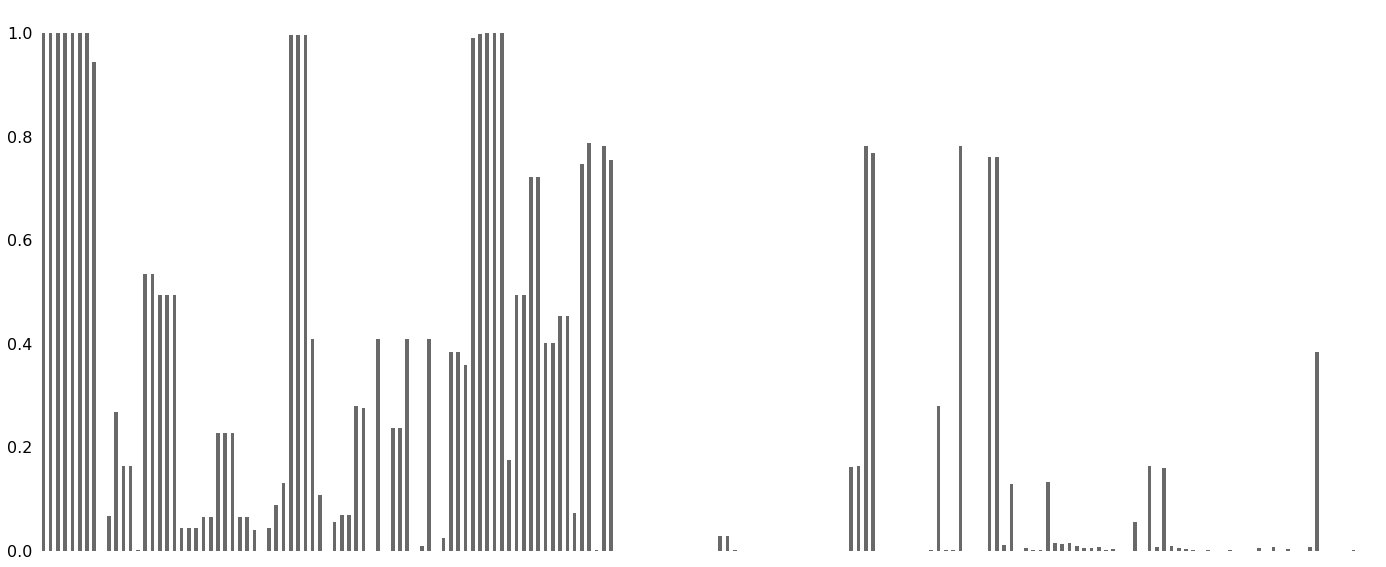

In [7]:
msno.bar(data)

Plusieurs  variables ont un taux de remplissage inférieur à 0.1

In [3]:
# On garde les varibles qui ont un taux de remplissage supérieur à 90%
df=data[data.columns[data.isna().sum()/data.shape[0]<0.9]]

In [9]:
df.shape

(1642492, 66)

Il nous  reste  66 variables  

#### Affichage des variables 

In [10]:
for c  in df.columns:
    print(c)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
labels
labels_tags
labels_en
stores
countries
countries_tags
countries_en
ingredients_text
allergens
serving_size
serving_quantity
additives_n
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
main_category
main_category_en
image_url
image_small_url
image_ingredients_url
image_ingredients_small_url
image_nutrition_url
image_nutrition_small_url
energy-kcal_100g
energy_100g
fat_100g
saturated-fat_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g


#### Affichage le taux de remplissage de ces variables 

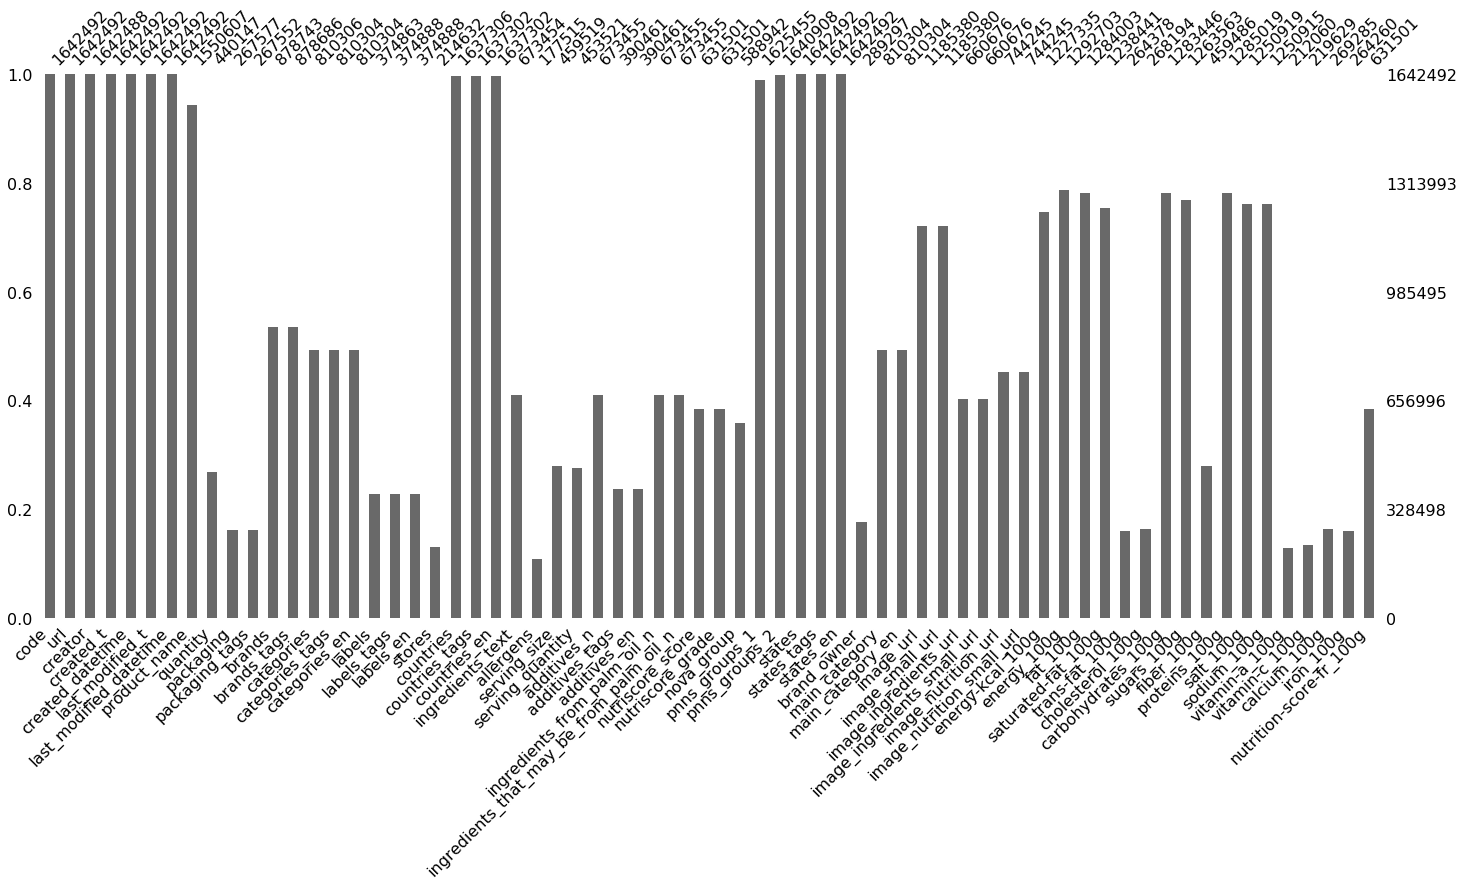

In [11]:
msno.bar(df,labels=True)

#### Parcourir  les variables et repérer les variables doublons 

In [12]:
for c  in df.columns:
    if c.__contains__("packaging"):
        print(c)

packaging
packaging_tags


In [13]:
df.loc[:,['packaging','packaging_tags']].sample(50)

packaging         packaging_tags
269335                     NaN                    NaN
1000757                    NaN                    NaN
862967   6 sachets individuels  6-sachets-individuels
371023                     NaN                    NaN
870687                     NaN                    NaN
1373521        Bottiglia,Vetro        bottiglia,vetro
388604                     NaN                    NaN
276892                     NaN                    NaN
939668                     NaN                    NaN
706906               Tetra Pak              tetra-pak
936570                     NaN                    NaN
312725                     NaN                    NaN
114269                     NaN                    NaN
1618674                    NaN                    NaN
1622666                    NaN                    NaN
933630                     NaN                    NaN
180                        NaN                    NaN
1240074                    NaN                    NaN
1149833                    NaN                    NaN
356003                     NaN                    NaN
125312                     NaN                    NaN
874147                     NaN                    NaN
1045557      Papier,Kunststoff      papier,kunststoff
1216556                    NaN                    NaN
1452677                    NaN                    NaN
1507464                    NaN                    NaN
711024        Sachet,Plastique       sachet,plastique
974996                     NaN                    NaN
324518                     NaN                    NaN
1194729                    NaN                    NaN
1639944                    NaN                    NaN
109857                     NaN                    NaN
726897     bouteilles en verre    bouteilles-en-verre
448943                     NaN                    NaN
1018337                    NaN                    NaN
64193                      NaN                    NaN
177979                     NaN                    NaN
1356381                    NaN                    NaN
356490                     NaN                    NaN
1585076              Plastique              plastique
32632                      NaN                    NaN
295617                     NaN                    NaN
969614                     NaN                    NaN
165379                     NaN                    NaN
530255                     NaN                    NaN
1452648                    NaN                    NaN
1037680                   Tüte                   tute
355840                     NaN                    NaN
442373                     NaN                    NaN
196673                     NaN                    NaN

In [14]:
for c  in df.columns:
    if c.__contains__("brands"):
        print(c)

brands
brands_tags


In [15]:
df.loc[:,['brands','brands_tags']]

brands    brands_tags
0                  NaN            NaN
1                  NaN            NaN
2                  NaN            NaN
3        courte paille  courte-paille
4                 Watt           watt
...                ...            ...
1642487            NaN            NaN
1642488          Pagès          pages
1642489            NaN            NaN
1642490            NaN            NaN
1642491            NaN            NaN

[1642492 rows x 2 columns]

In [16]:
for c  in df.columns:
    if c.__contains__("countries"):
        print(c)

countries
countries_tags
countries_en


In [14]:
df.loc[:,['countries','countries_tags','countries_en']]

countries countries_tags countries_en
0           France      en:france       France
1           France      en:france       France
2            en:es       en:spain        Spain
3           France      en:france       France
4        en:France      en:france       France
...            ...            ...          ...
1642487      en:re     en:reunion      Réunion
1642488  en:france      en:france       France
1642489      en:be     en:belgium      Belgium
1642490  en:france      en:france       France
1642491     France      en:france       France

[1642492 rows x 3 columns]

In [17]:
for c  in df.columns:
    if c.__contains__("addi"):
        print(c)

additives_n
additives_tags
additives_en


In [18]:
df.loc[:,['additives_n','additives_tags','additives_en']].sample(50)

additives_n                                     additives_tags  \
592251           NaN                                                NaN   
1036782          NaN                                                NaN   
1475947          NaN                                                NaN   
1458146          NaN                                                NaN   
1166902          NaN                                                NaN   
844782           3.0                   en:e321,en:e322,en:e322i,en:e422   
541951           NaN                                                NaN   
1511665          NaN                                                NaN   
918297           NaN                                                NaN   
1083740          0.0                                                NaN   
1417189          NaN                                                NaN   
582400           4.0                    en:e120,en:e221,en:e300,en:e331   
1435033          NaN                                                NaN   
1049968          NaN                                                NaN   
890942           1.0                                            en:e440   
814723           NaN                                                NaN   
261797           NaN                                                NaN   
1582426          NaN                                                NaN   
1429980          NaN                                                NaN   
265780           NaN                                                NaN   
1099260          NaN                                                NaN   
1437661          NaN                                                NaN   
693988           1.0                                           en:e14xx   
1579383          1.0                                            en:e330   
708045           1.0                                            en:e100   
812776           NaN                                                NaN   
1222763          NaN                                                NaN   
22071            0.0                                                NaN   
967989           NaN                                                NaN   
1419958          2.0                                    en:e330,en:e440   
1543691          NaN                                                NaN   
433627           1.0                                            en:e440   
795197           NaN                                                NaN   
1048357          NaN                                                NaN   
718052           NaN                                                NaN   
1118447          0.0                                                NaN   
173370           3.0                  en:e330,en:e331,en:e500,en:e500ii   
100241           0.0                                                NaN   
1040180          NaN                                                NaN   
608155           NaN                                                NaN   
455020           NaN                                                NaN   
1004162          0.0                                                NaN   
1334365          0.0                                                NaN   
323358           0.0                                                NaN   
303857           NaN                                                NaN   
867979           NaN                                                NaN   
666637           2.0                                    en:e392,en:e503   
432499           0.0                                                NaN   
571012           NaN                                                NaN   
26704            8.0  en:e129,en:e133,en:e150c,en:e322,en:e322i,en:e...   

                                              additives_en  
592251                                                 NaN  
1036782                                                NaN  


In [19]:
for c  in df.columns:
    if c.__contains__("categ"):
        print(c)       

categories
categories_tags
categories_en
main_category
main_category_en


In [20]:
df.loc[:,['categories','categories_tags','categories_en','main_category_en']].sample(50)

categories  \
702129   Aliments et boissons à base de végétaux, Alime...   
610140                                                 NaN   
837545                                                 NaN   
640463   Aliments et boissons à base de végétaux, Alime...   
238433                                              Snacks   
1229147  en:Farming products, Ägg, en:Chicken eggs, en:...   
191269                                                 NaN   
1478559                                                NaN   
116930   Plant-based foods and beverages, Beverages, Pl...   
862414   Viandes, Charcuteries, Produits à la viande, T...   
1457933                                    Cacaos en polvo   
459185                                                 NaN   
1365964  Plant-based foods and beverages, Plant-based f...   
350949                                        Frozen foods   
449200                                                 NaN   
1042991                                                NaN   
1461718                                                NaN   
476589                                                 NaN   
1117009                                                NaN   
83892    Plant-based foods and beverages, Plant-based f...   
1246350  Aliments et boissons à base de végétaux, Alime...   
1172080                                                NaN   
764664                                                 NaN   
319398   Beverages, Dried products, Dried products to b...   
383456              Meals, Pizzas pies and quiches, Pizzas   
597103                                                 NaN   
81910    Snacks, Sweet snacks, Biscuits and cakes, Bisc...   
191434   Beverages, Dried products, Dried products to b...   
411596                                              Snacks   
750848                                                 NaN   
1619048  Aliments et boissons à base de végétaux, Boiss...   
1587667  Aliments et boissons à base de végétaux, Alime...   
1162790                                                NaN   
265776                                                 NaN   
690602   Produits laitiers, Produits fermentés, Produit...   
440741   Plant-based foods and beverages, Plant-based f...   
1045518                                                NaN   
885780                          Crêpes et galettes, Crêpes   
1022470                                                NaN   
286786                                                 NaN   
91099                                               Snacks   
1345324  Produits laitiers, Produits à tartiner, Matièr...   
198937   Plant-based foods and beverages, Plant-based f...   
516394   Getränke, Milchprodukte, Milch, Homogenisierte...   
1043090  Plats préparés, Frais, Plats à base de pâtes, ...   
1542677                                                NaN   
1632495                                                NaN   
1335948                                      Línea gourmet   
724665                Surgelés, Entrées et snacks surgelés   
331088                             Groceries, Sauces, Dips   

                                           categories_tags  \
702129   en:plant-based-foods-and-beverages,en:plant-ba...   
610140                                                 NaN   
837545                                                 NaN   
640463   en:plant-based-foods-and-beverages,en:plant-ba...   
238433                                           en:snacks   
1229147  en:farming-products,en:eggs,en:chicken-eggs,en...   
191269                                                 NaN   
1478559                                                NaN   
116930   en:plant-based-foods-and-beverages,en:beverage...   
862414   en:meats,en:prepared-meats,en:meat-based-produ...   
1457933    en:cocoa-and-chocolate-powders,en:cocoa-powders   
459185                                                 NaN   
1365964  en:plant-based-foods-and-beverages,en:plant-ba...   
350949           

In [21]:
for c  in df.columns:
    if c.__contains__("group"):
        print(c)      

nova_group
pnns_groups_1
pnns_groups_2


In [17]:
df.loc[:,['nova_group','pnns_groups_1','pnns_groups_2']].sample(20)

nova_group            pnns_groups_1         pnns_groups_2
652707          NaN           Fat and sauces  Dressings and sauces
248173          NaN                  unknown               unknown
1479754         NaN                  unknown               unknown
607931          4.0             Salty snacks            Appetizers
380346          4.0            Sugary snacks                Sweets
245569          3.0           Fish Meat Eggs                  Meat
1572103         NaN    Fruits and vegetables            Vegetables
1410497         NaN                  unknown               unknown
385843          3.0    Fruits and vegetables            Vegetables
1455380         NaN                  unknown               unknown
507768          NaN                  unknown               unknown
473965          4.0                  unknown               unknown
821781          NaN                  unknown               unknown
193568          NaN                  unknown               unknown
1588271         NaN                  unknown               unknown
563579          NaN           Fish Meat Eggs                  Meat
1085563         NaN  Milk and dairy products                Cheese
914049          NaN                  unknown               unknown
1021413         3.0     Cereals and potatoes               Legumes
404279          3.0                  unknown               unknown

In [22]:
for c  in df.columns:
    if c.__contains__("labels"):
        print(c)

labels
labels_tags
labels_en


In [23]:
df.loc[:,['labels','labels_tags','labels_en']].sample(50)

labels  \
904107                                            NaN   
26126                                  en:gluten-free   
1101619                                           NaN   
248183                                            NaN   
1001554                                           NaN   
480077              No preservatives, en:no-colorings   
1011202                                           NaN   
1451612                                           NaN   
276761                                            NaN   
954470                                            NaN   
1540792                                           NaN   
1513916                                           NaN   
1058013                                           NaN   
1217010                                           NaN   
222068                                            NaN   
1299556                                           NaN   
823401                                en:no-colorings   
770578                                            NaN   
966645                                            NaN   
1458750                                       Organic   
1044061                                           NaN   
372238                                            NaN   
809669                                   Label Rouge    
1458375                                           NaN   
457057                                            NaN   
392991                                            NaN   
1387091                                           NaN   
654981                                            NaN   
288477                                            NaN   
197086                                            NaN   
603338                                            NaN   
1323389                                           NaN   
92706                                             NaN   
1626882                                           NaN   
1010394                                           NaN   
1063083                                           NaN   
1243781                                           NaN   
302702                                            NaN   
1487140                                en:gluten-free   
116299                                            NaN   
532800                                            NaN   
1525095                                           NaN   
914710                                            NaN   
79132                                             NaN   
212967                                            NaN   
833521                                            NaN   
719695          Organic, Made in France, en:fr-bio-01   
969100   Bio, Bio européen, Produit en Bretagne         
195095                                            NaN   
1617811                                           NaN   

                                               labels_tags  \
904107                                                 NaN   
26126                                       en:gluten-free   
1101619                                                NaN   
248183                                                 NaN   
1001554                                                NaN   
480077                 en:no-colorings,en:no-preservatives   
1011202                                                NaN   
1451612                                                NaN   
276761                                                 NaN   
954470                                                 NaN   
1540792                                                NaN   
1513916                                                NaN   
1058013                                                NaN   
1217010                                                NaN   
222068                                                 NaN   
1299556                                                NaN   
823401                                     en:no-colorings   
770578                 

In [24]:
for c  in df.columns:
    if c.__contains__("score"):
        print(c)

nutriscore_score
nutriscore_grade
nutrition-score-fr_100g


In [20]:
df.loc[:,['nutriscore_score','nutriscore_grade','nutrition-score-fr_100g']].sample(20)

nutriscore_score nutriscore_grade  nutrition-score-fr_100g
361961                NaN              NaN                      NaN
1103789               NaN              NaN                      NaN
135548                3.0                c                      3.0
181301               -5.0                a                     -5.0
1145716               NaN              NaN                      NaN
572678                NaN              NaN                      NaN
1487967               NaN              NaN                      NaN
714227               -2.0                a                     -2.0
1595257               NaN              NaN                      NaN
1244782               NaN              NaN                      NaN
1373776               NaN              NaN                      NaN
23459                11.0                d                     11.0
1308283               NaN              NaN                      NaN
1191429               NaN              NaN                      NaN
27748                 NaN              NaN                      NaN
1400774               9.0                d                      9.0
1123780               NaN              NaN                      NaN
842386                NaN              NaN                      NaN
738564               13.0                d                     13.0
477105                1.0                b                      1.0

In [25]:
for c  in df.columns:
    if c.__contains__("state"):
        print(c)

states
states_tags
states_en


In [26]:
df.loc[:,['states','states_tags','states_en']]

states  \
0        en:to-be-completed, en:nutrition-facts-complet...   
1        en:to-be-completed, en:nutrition-facts-to-be-c...   
2        en:to-be-completed, en:nutrition-facts-to-be-c...   
3        en:to-be-completed, en:nutrition-facts-complet...   
4        en:to-be-completed, en:nutrition-facts-to-be-c...   
...                                                    ...   
1642487  en:to-be-completed, en:nutrition-facts-to-be-c...   
1642488  en:to-be-completed, en:nutrition-facts-to-be-c...   
1642489  en:to-be-completed, en:nutrition-facts-complet...   
1642490  en:to-be-completed, en:nutrition-facts-complet...   
1642491  en:to-be-completed, en:nutrition-facts-to-be-c...   

                                               states_tags  \
0        en:to-be-completed,en:nutrition-facts-complete...   
1        en:to-be-completed,en:nutrition-facts-to-be-co...   
2        en:to-be-completed,en:nutrition-facts-to-be-co...   
3        en:to-be-completed,en:nutrition-facts-complete...   
4        en:to-be-completed,en:nutrition-facts-to-be-co...   
...                                                    ...   
1642487  en:to-be-completed,en:nutrition-facts-to-be-co...   
1642488  en:to-be-completed,en:nutrition-facts-to-be-co...   
1642489  en:to-be-completed,en:nutrition-facts-complete...   
1642490  en:to-be-completed,en:nutrition-facts-complete...   
1642491  en:to-be-completed,en:nutrition-facts-to-be-co...   

                                                 states_en  
0        To be completed,Nutrition facts completed,Ingr...  
1        To be completed,Nutrition facts to be complete...  
2        To be completed,Nutrition facts to be complete...  
3        To be completed,Nutrition facts completed,Ingr...  
4        To be completed,Nutrition facts to be complete...  
...                                                    ...  
1642487  To be completed,Nutrition facts to be complete...  
1642488  To be completed,Nutrition facts to be complete...  
1642489  To be completed,Nutrition facts completed,Ingr...  
1642490  To be completed,Nutrition facts completed,Ingr...  
1642491  To be completed,Nutrition facts to be complete...  

[1642492 rows x 3 columns]

In [4]:
#supression des variables qui contiennent [tags,_en,pnns,-score] 
for c  in df.columns:
    if c.__contains__("tags"):
        df.drop(columns=[c], inplace=True )
    if c.__contains__("_en")and (c!='main_category_en'):
        df.drop(columns=[c], inplace=True ) 
    if c.__contains__("pnns"):
        df.drop(columns=[c], inplace=True )
    if c.__contains__("-score"):
        df.drop(columns=[c], inplace=True ) 
df.drop(columns=['categories','states'],inplace=True)                

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


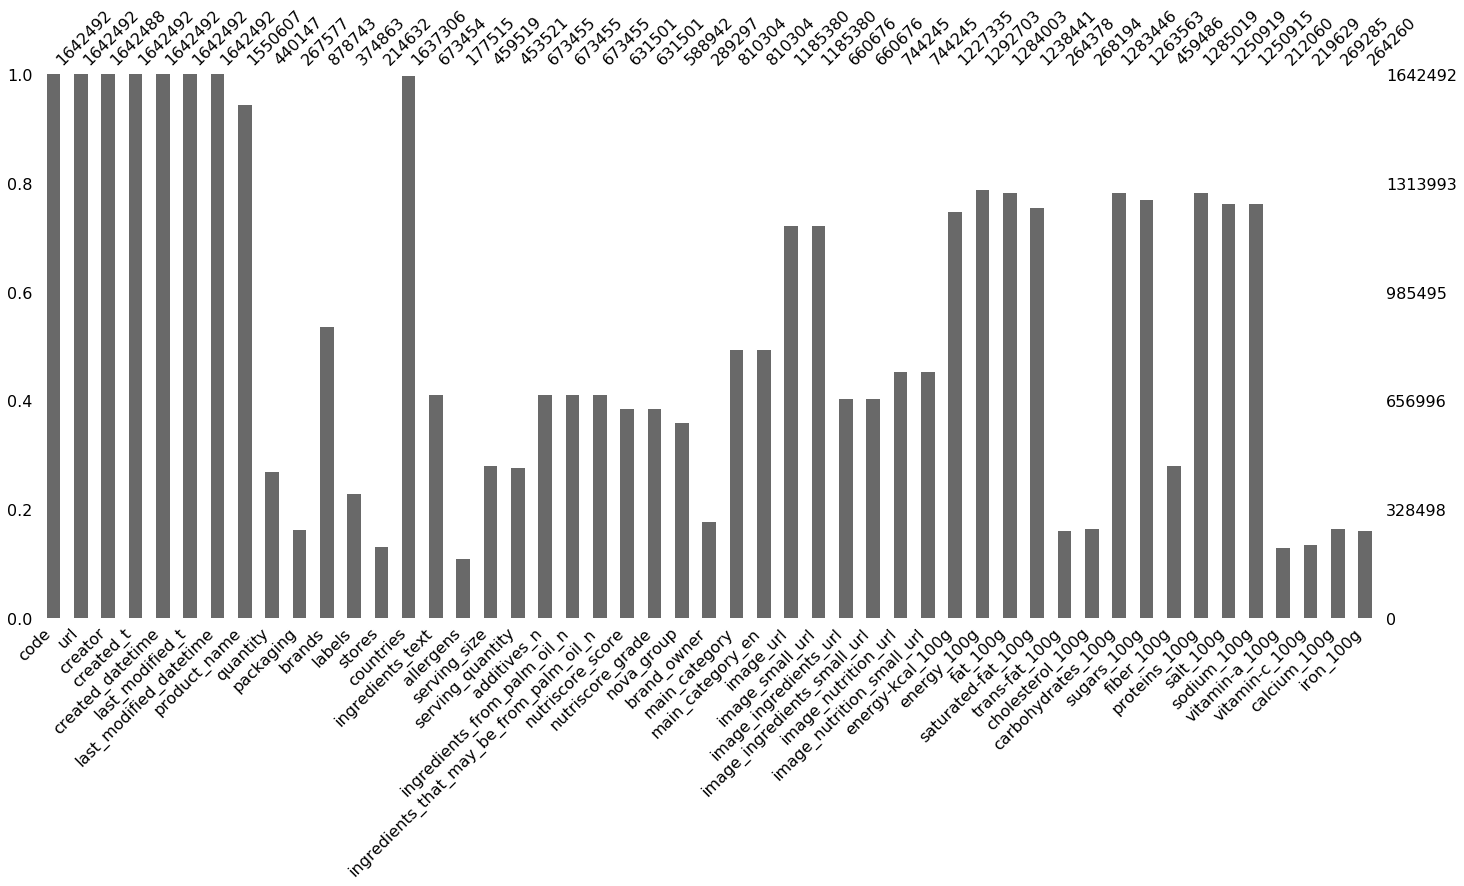

In [28]:
# le nouveau  data  set 
msno.bar(df,labels=True )

In [29]:
df.shape

(1642492, 49)

## Idée d'application
### Notre objectif est de develloper  une application qui scane le code bar d'un produit et  calculer  le nutriscore à partiri des élements nutritifs suivants:
###### Le nombre de calories contenues dans le produit fini
###### La quantité d’acides gras
###### La dose de sucres
###### La dose de sel
###### La proportion de fibres
###### La proportion de Protéeins


In [5]:
dp = pd.DataFrame(df,columns=['code','nutriscore_score','nutriscore_grade','countries','energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','proteins_100g','salt_100g','sodium_100g','fiber_100g','sugars_100g','main_category_en'])

In [31]:
dp.head()

code  nutriscore_score nutriscore_grade  countries  \
0         0000000000017               NaN              NaN     France   
1         0000000000031               NaN              NaN     France   
2    000000000003327986               NaN              NaN      en:es   
3         0000000000100              18.0                d     France   
4  00000000001111111111               NaN              NaN  en:France   

   energy-kcal_100g  energy_100g  fat_100g  saturated-fat_100g  \
0             375.0       1569.0       7.0                3.08   
1               NaN          NaN       NaN                 NaN   
2               NaN          NaN       NaN                 NaN   
3               NaN        936.0       8.2                2.20   
4               NaN          NaN       NaN                 NaN   

   trans-fat_100g  proteins_100g  salt_100g  sodium_100g  fiber_100g  \
0             NaN            7.8        1.4         0.56         NaN   
1             NaN            NaN        NaN          NaN         NaN   
2             NaN            NaN        NaN          NaN         NaN   
3             NaN            5.1        4.6         1.84         0.0   
4             NaN            NaN        NaN          NaN         NaN   

   sugars_100g main_category_en  
0         15.0              NaN  
1          NaN              NaN  
2          NaN              NaN  
3         22.0         Mustards  
4          NaN           fr:xsf

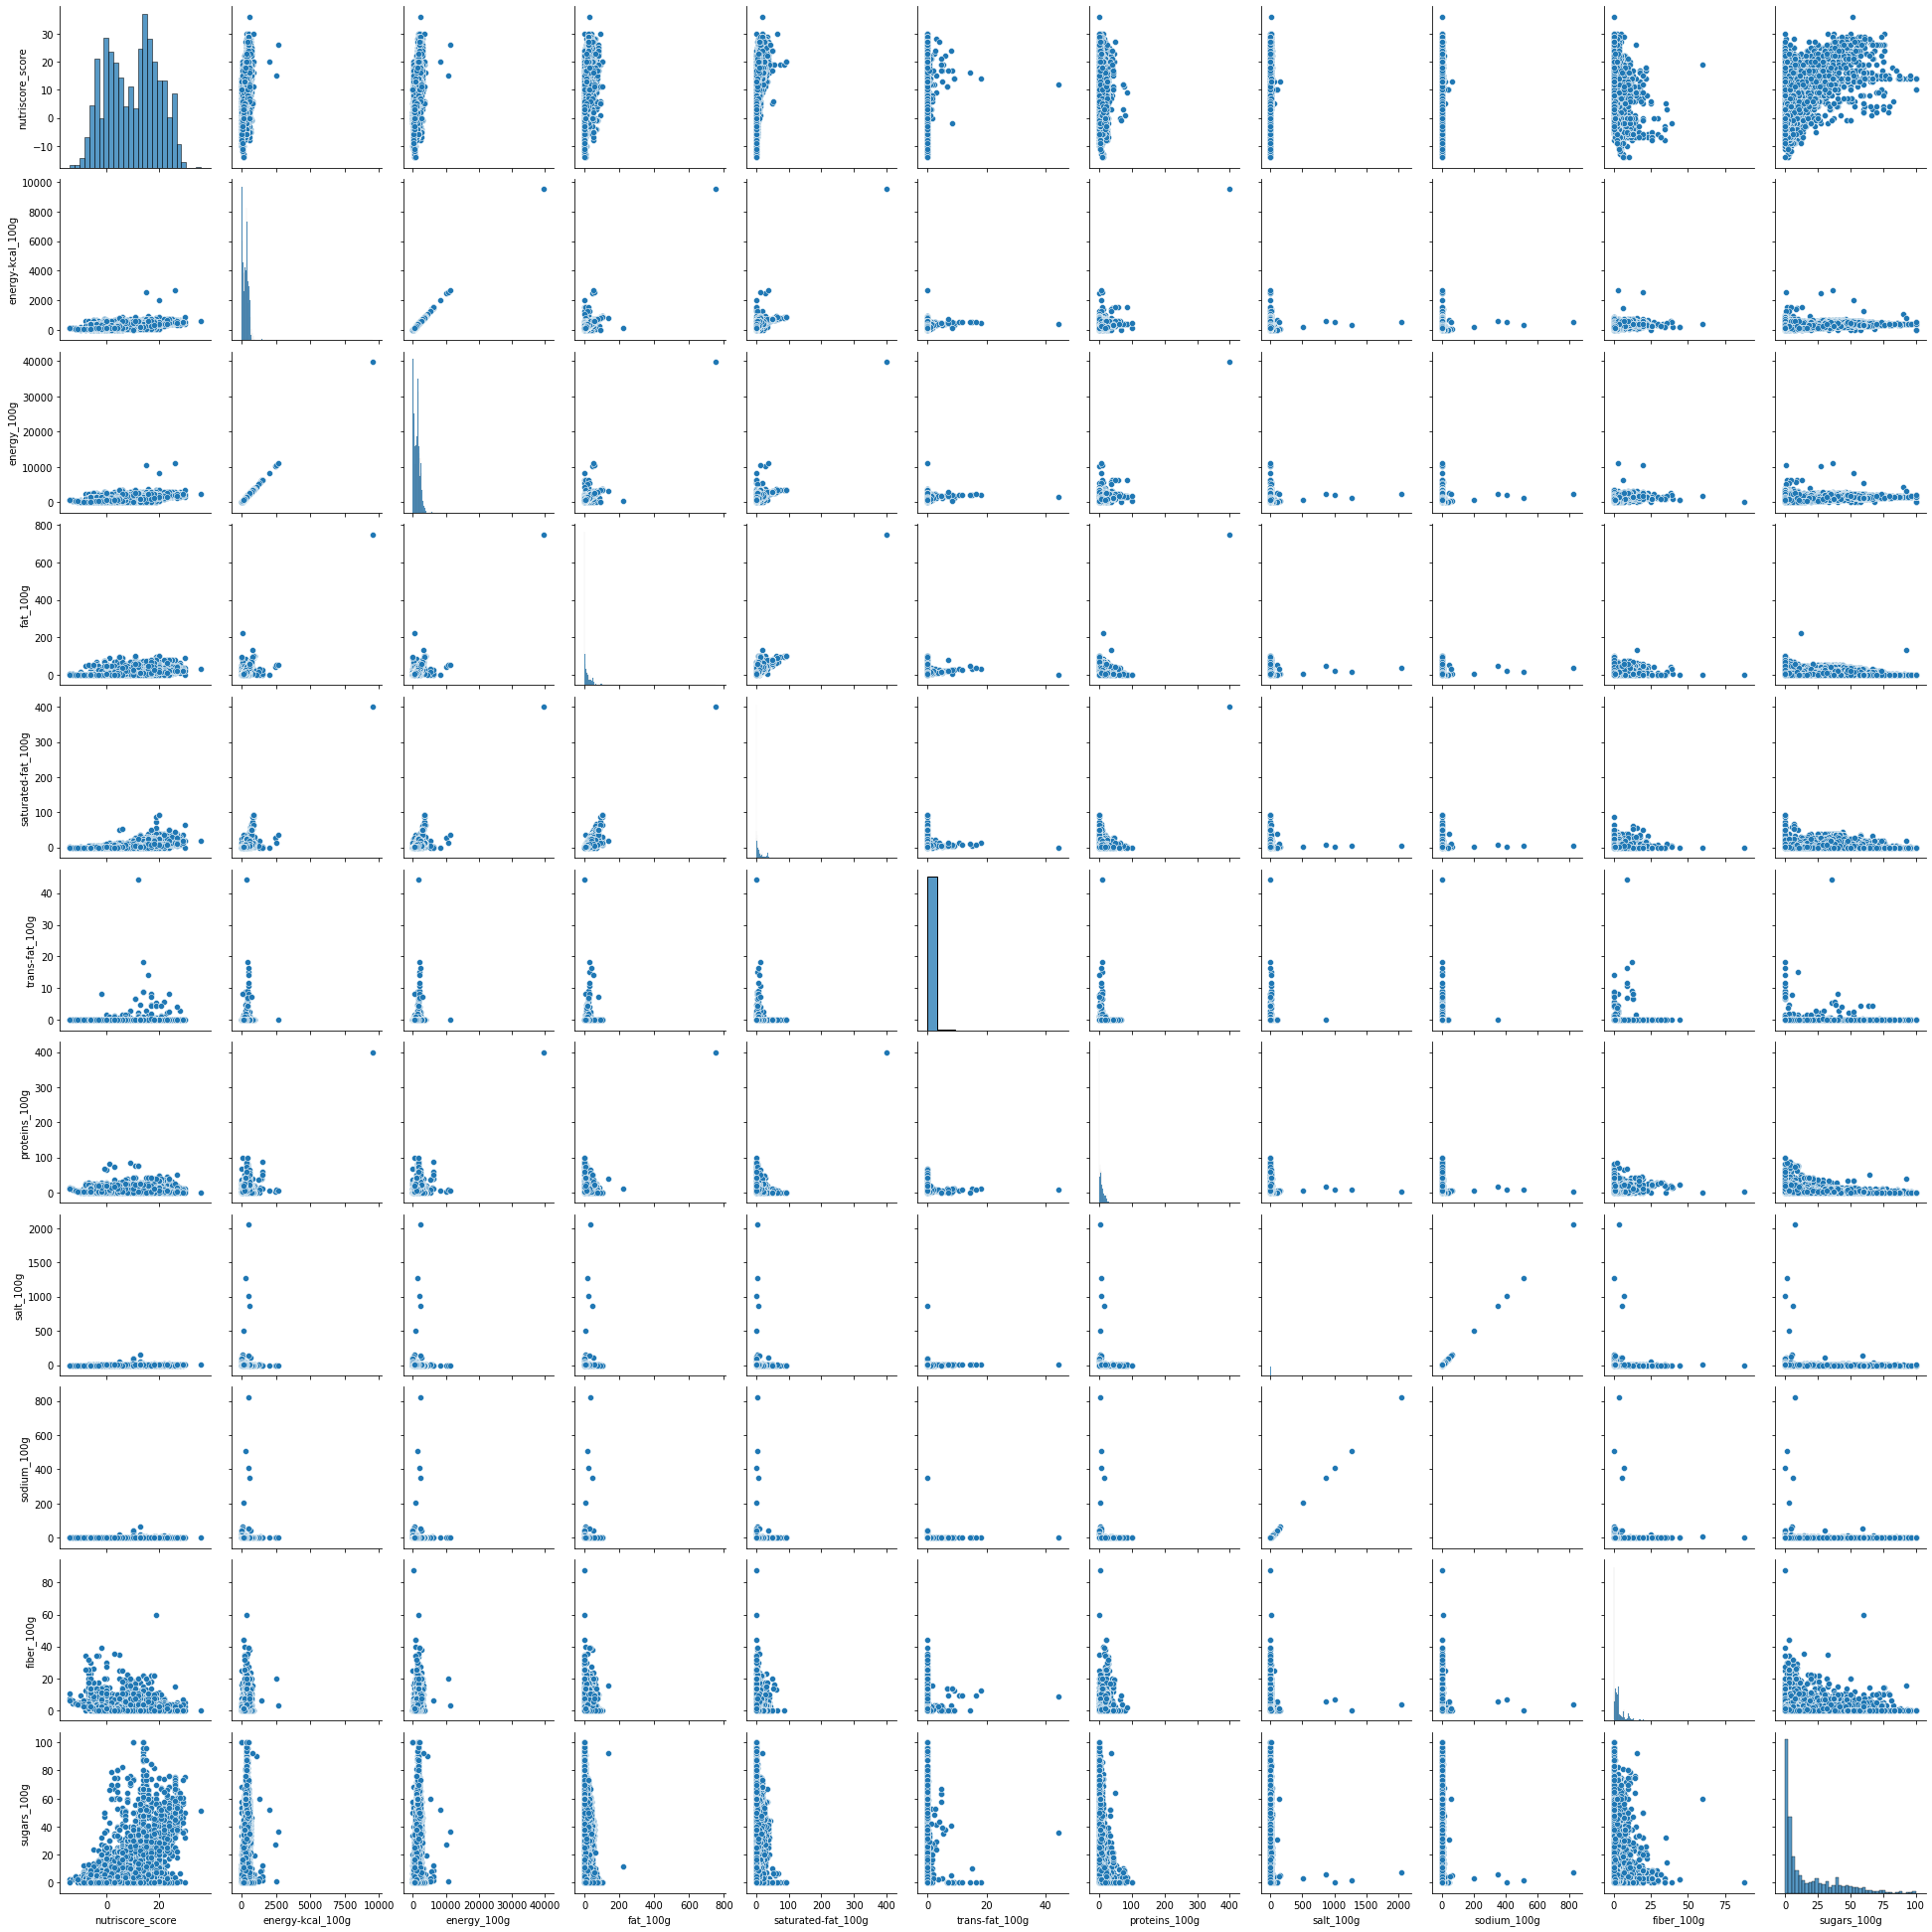

In [46]:
sns.pairplot(dp) 

Relation linéaire:(salt_100g,sodium_100g)aussi (energy-kcal_100g,energy_100g)

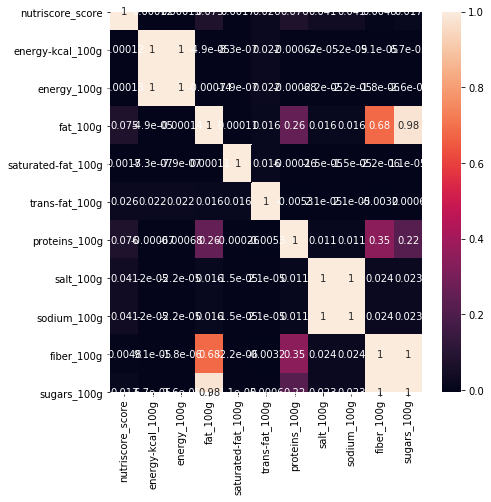

In [8]:
fig,aa=plt.subplots(figsize=(7,7))
sns.heatmap(dp.corr(),annot=True,ax=aa)

La relation de linearite avec pairplot  entre salt_100g et sodieum_100g , energy_kcal_100g et energy_100g  est confirmé par la matrice de corrélation 

On garde les deux variables:salt_100g et energy_100g

In [6]:
dp.drop(columns=['sodium_100g','energy_100g'],inplace=True)

#### Les valeurs possibles des variables :nutriscore_score,nutriscore_grade

In [10]:
dp.nutriscore_score.unique()

array([ nan,  18.,   1.,  14.,  -2.,   4.,   0.,  -4.,  15.,  17.,  21.,
         2.,   3.,  29.,   6.,  22.,   9.,   7.,   5.,  28.,  23.,  11.,
        20.,  12.,  16.,  26.,  19.,  24.,  13.,  36.,  -3.,  27.,  10.,
         8.,  25.,  -7.,  -6.,  -5.,  -1.,  -8.,  -9., -11.,  30., -10.,
       -13., -12., -14.,  33.,  31.,  34.,  32.,  35.,  37., -15.,  40.,
        38.,  39.])

In [7]:
dp.nutriscore_score.value_counts()

 14.0    32870
 0.0     31815
 13.0    27873
 11.0    27581
 2.0     26911
 15.0    26265
 1.0     26029
 12.0    25674
 3.0     25612
 16.0    24297
-1.0     23991
 4.0     22685
 5.0     19796
 17.0    19021
-4.0     17442
 6.0     17340
 19.0    17313
 18.0    17296
-2.0     16600
 10.0    16362
 20.0    15623
-3.0     14865
 7.0     12864
 9.0     12843
 21.0    12828
 8.0     12336
 24.0    11066
 22.0    10620
-5.0     10462
 23.0    10307
 25.0     9708
 26.0     8765
-6.0      8641
 27.0     5375
-7.0      3636
-8.0      2497
 28.0     1904
-9.0      1223
-10.0      903
 29.0      585
 30.0      393
-11.0      341
-12.0      251
 31.0      163
-13.0      153
 32.0       90
-14.0       72
 33.0       67
 34.0       57
 35.0       39
 36.0       31
 37.0        9
 40.0        6
-15.0        3
 39.0        1
 38.0        1
Name: nutriscore_score, dtype: int64

In [8]:
dp.nutriscore_grade.unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

On voit  que nutriscore_grade=[a,b,c,d,e]et nutriscore_score=[-15:40]

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

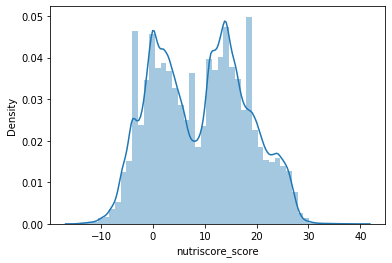

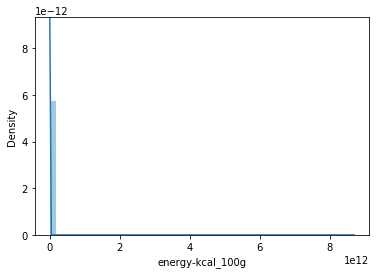

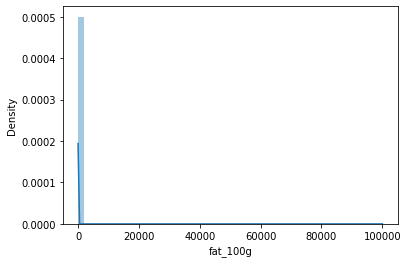

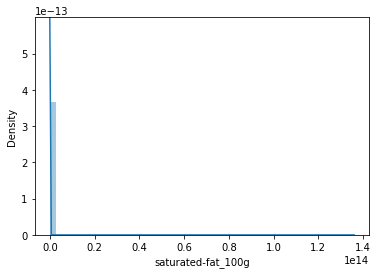

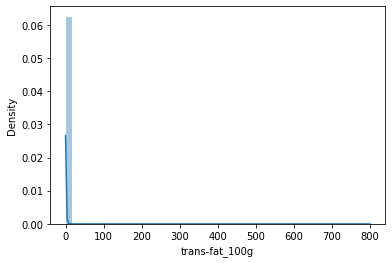

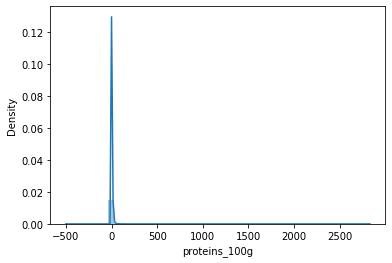

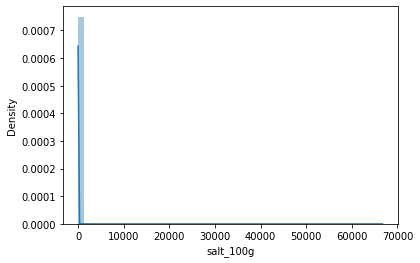

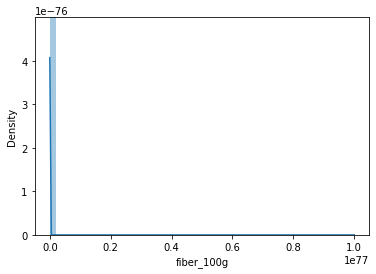

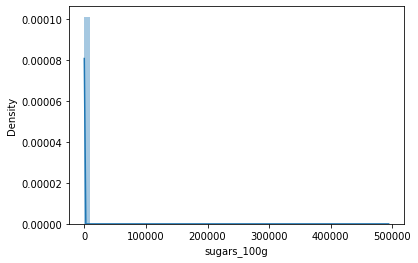

In [52]:
for  col in dp.select_dtypes('float'):
    plt.figure()
    sns.distplot(dp[col])

Variable nutriscore_score a une distribution bimodale ,ce qui est pas le cas pour les autres variables  

#### Détection outliers 

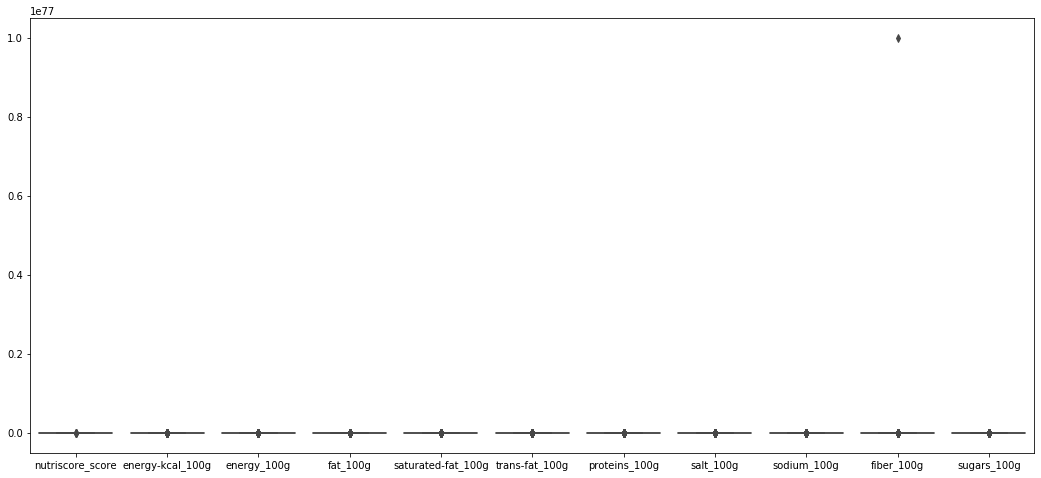

In [13]:
fig,aa=plt.subplots(figsize=(18,8))
sns.boxplot(data=dp,ax=aa)

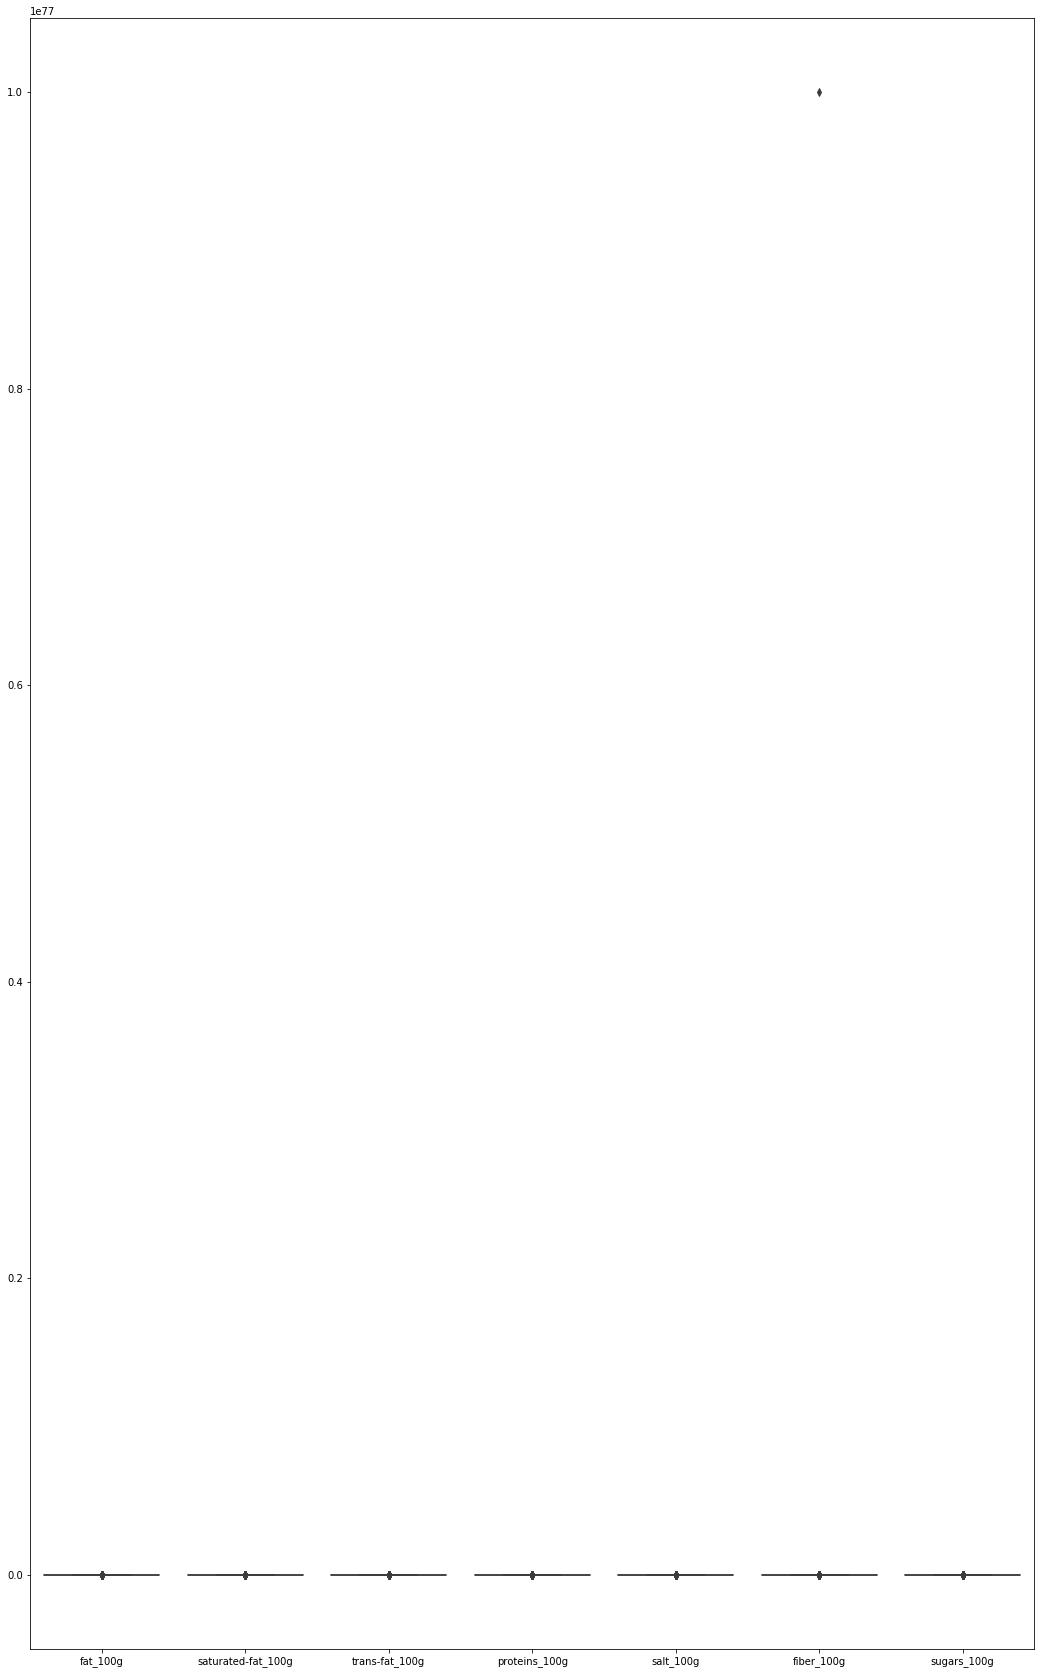

In [38]:
#Variables d'unité g
fig,aa=plt.subplots(figsize=(18,30))
sns.boxplot(data=dp.loc[:,['fat_100g','saturated-fat_100g', 'trans-fat_100g', 'proteins_100g', 'salt_100g','fiber_100g','sugars_100g']],ax=aa)

Il ya des aberrantes qui ont une valeur >100g , aussi negative pour  trans-fat_100g ,saturated-fat_100g et proteins_100g

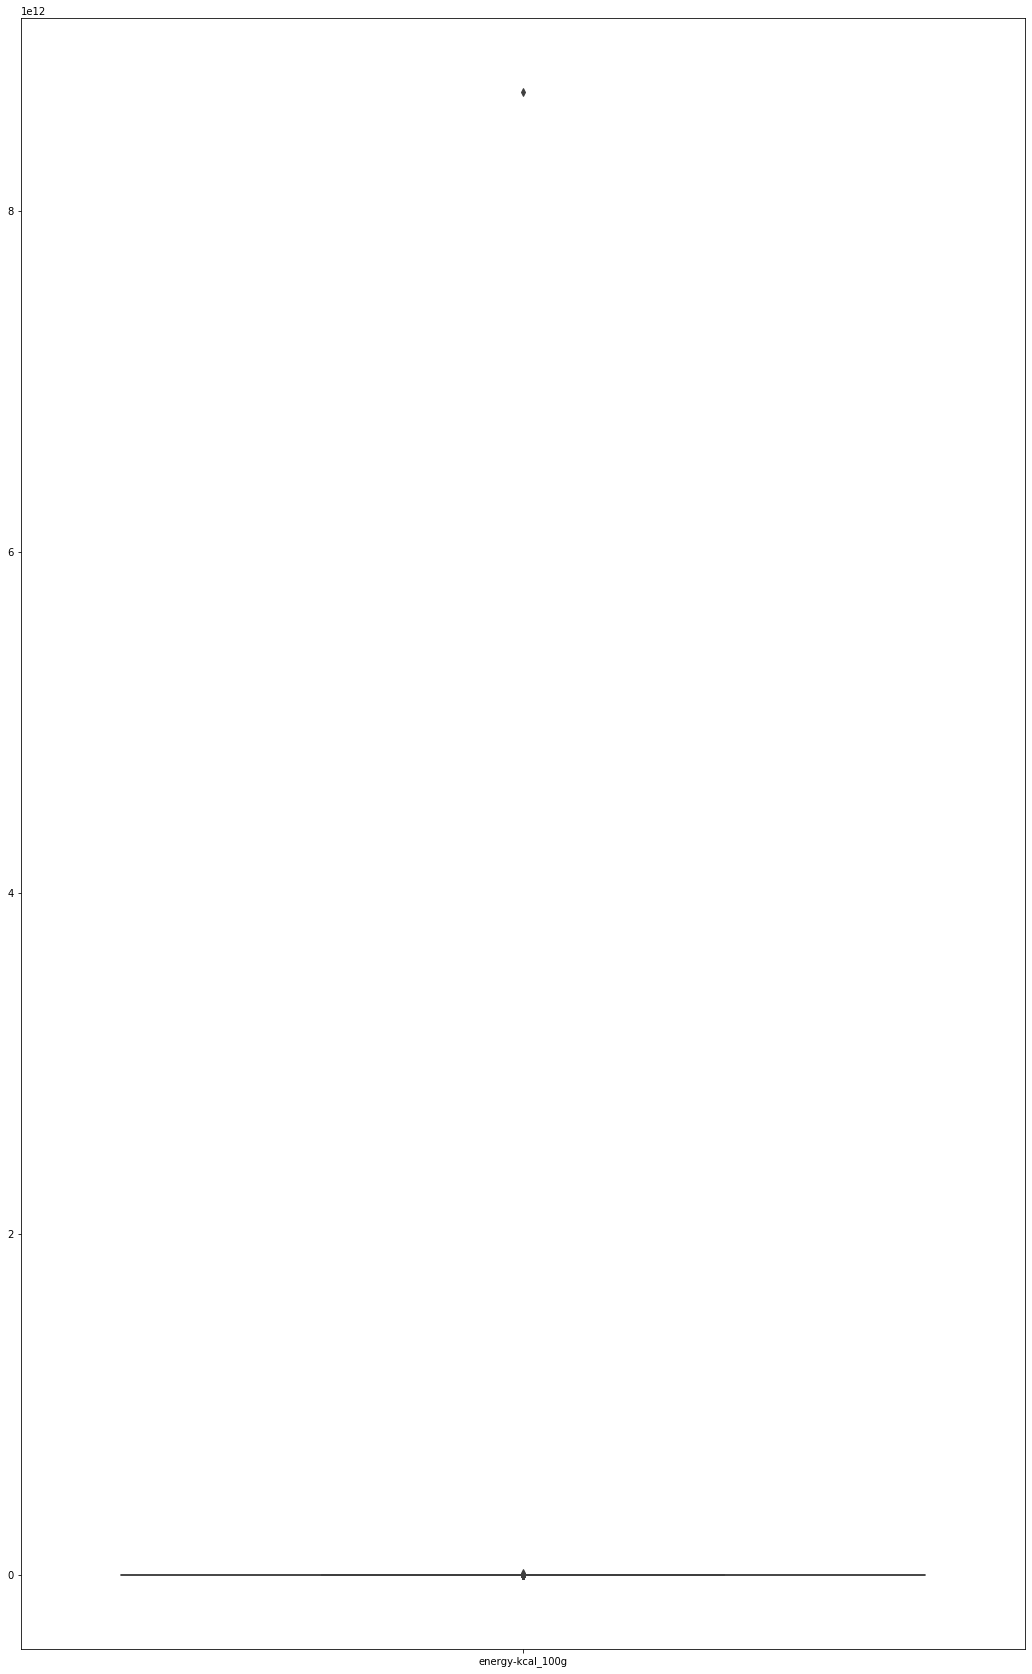

In [40]:
#Variables d'unité Kcal
fig,aa=plt.subplots(figsize=(18,30))
sns.boxplot(data=dp.loc[:,['energy-kcal_100g']],ax=aa)

On  voit  que il y a  des valeurs abérrantes >888Kcal

#### Supression des outliers  et sélection  des produits de la France 

In [14]:
dp=dp[(dp['energy-kcal_100g'] <= 888)&(dp['energy-kcal_100g'] >= 0)&((dp['fat_100g'] <= 100)&(dp['fat_100g'] >= 0))&((dp['saturated-fat_100g'] <= 100)&(dp['saturated-fat_100g'] >= 0))&((dp['trans-fat_100g'] <= 100)&(dp['trans-fat_100g'] >= 0))&((dp['proteins_100g'] <= 100)&(dp['proteins_100g'] >= 0))&((dp['salt_100g'] <= 100)&(dp['salt_100g'] >= 0))&((dp['fiber_100g'] <= 100)&(dp['fiber_100g'] >= 0))&((dp['sugars_100g'] <= 100)&(dp['sugars_100g'] >= 0 ))]

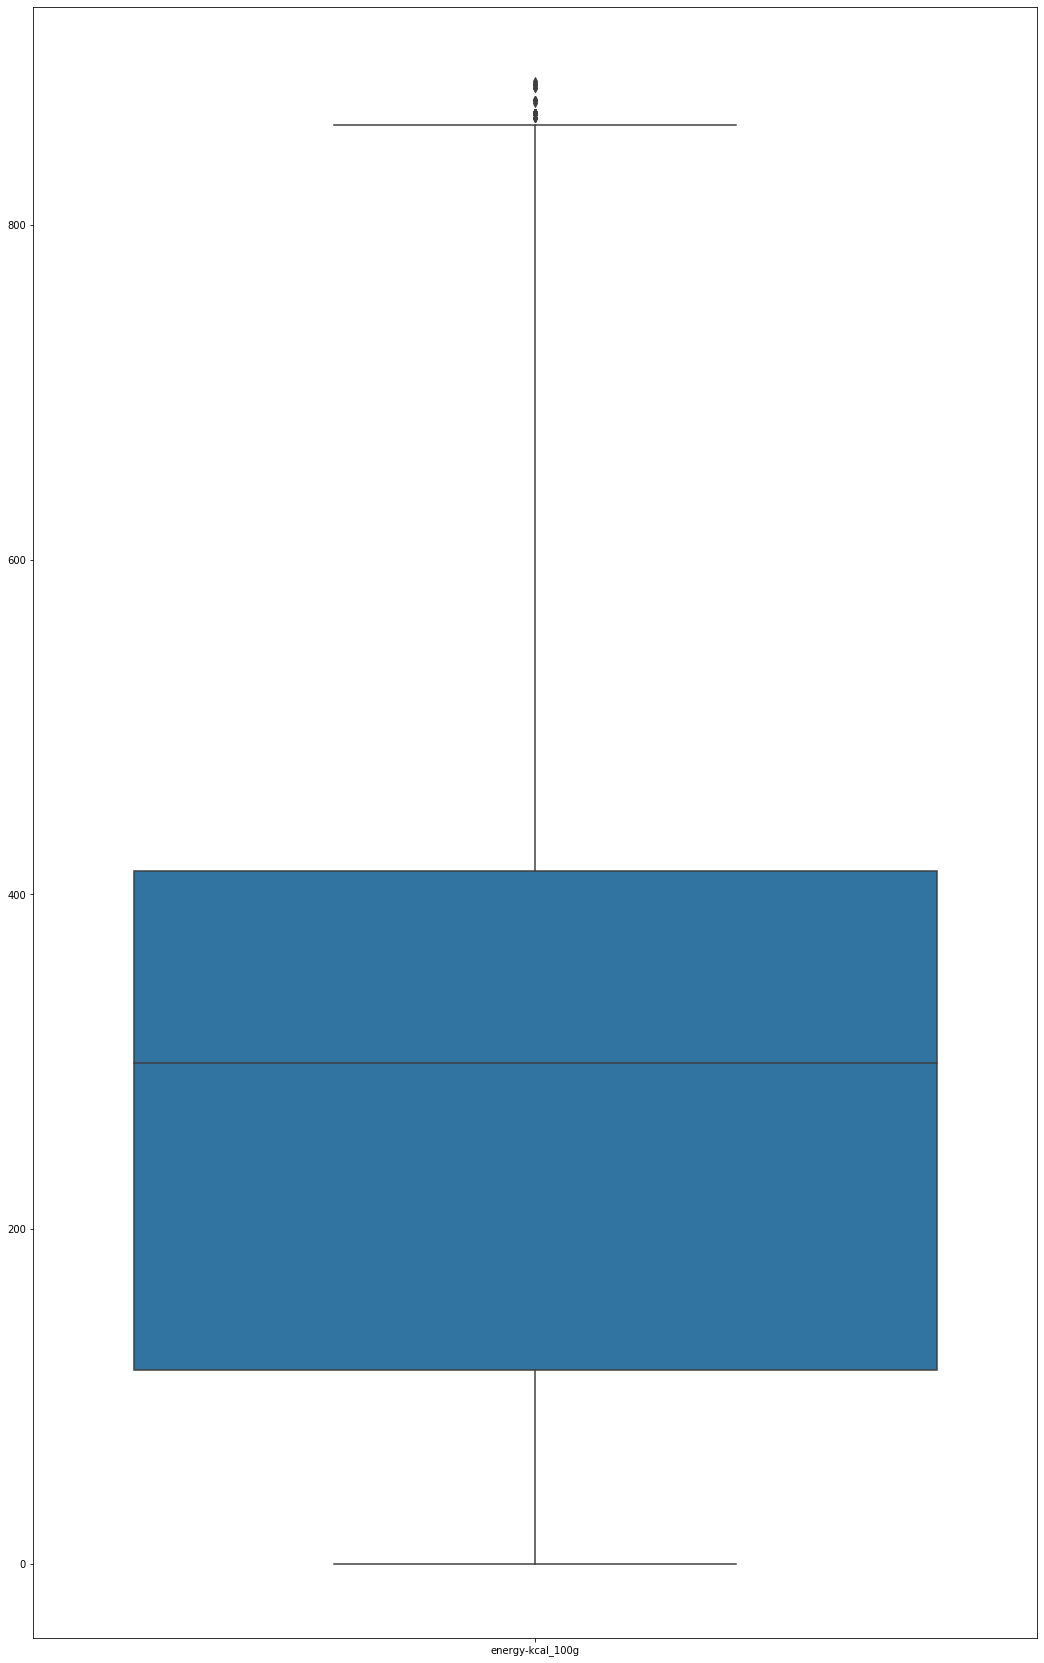

In [42]:
#Variable en unité Kcal
fig,aa=plt.subplots(figsize=(18,30))
sns.boxplot(data=dp.loc[:,['energy-kcal_100g']],ax=aa)

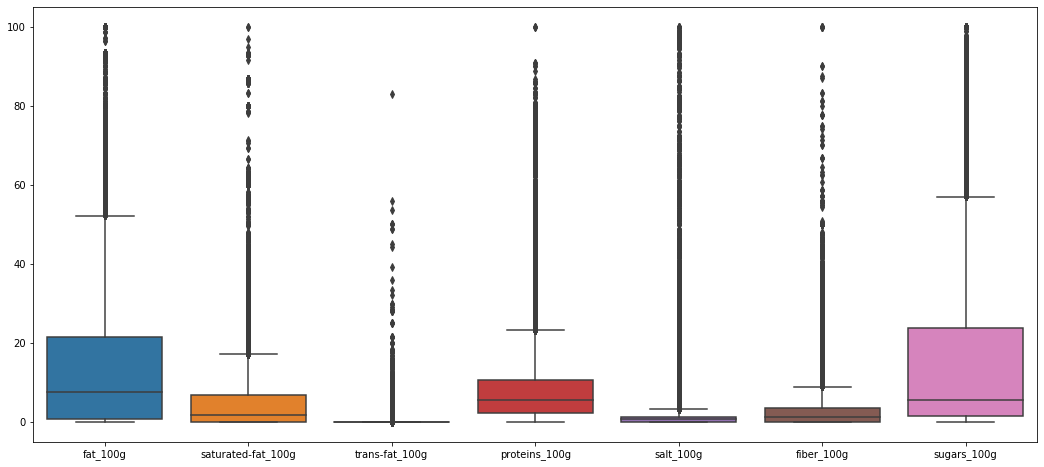

In [17]:
#Variables en unité g
fig,aa=plt.subplots(figsize=(18,8))
sns.boxplot(data=dp.loc[:,['fat_100g','saturated-fat_100g', 'trans-fat_100g', 'proteins_100g', 'salt_100g','fiber_100g','sugars_100g']],ax=aa)

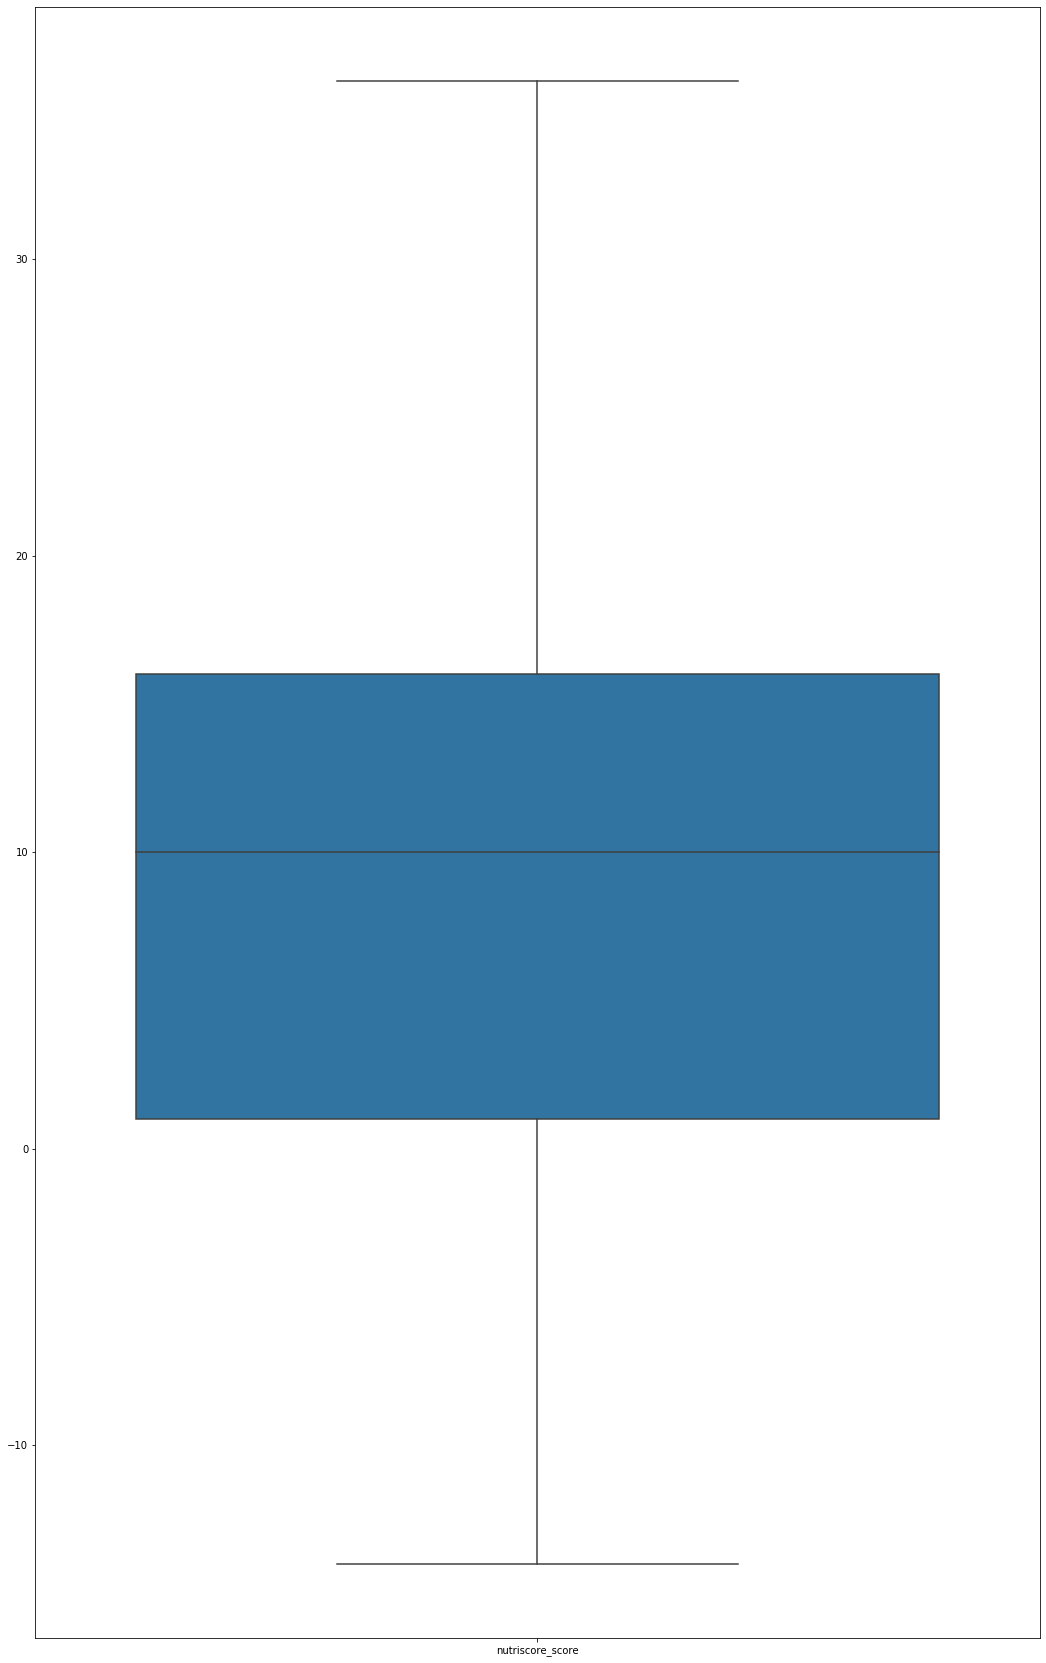

In [44]:
#Variable nutriscore_score
fig,aa=plt.subplots(figsize=(18,30))
sns.boxplot(data=dp.loc[:,['nutriscore_score']],ax=aa)

In [45]:
dp.describe()

nutriscore_score  energy-kcal_100g       fat_100g  saturated-fat_100g  \
count     224243.000000     247776.000000  247776.000000       247776.000000   
mean           9.054544        285.412805      13.020544            4.590268   
std            9.125894        176.274822      15.151154            6.666166   
min          -14.000000          0.000000       0.000000            0.000000   
25%            1.000000        116.000000       0.880000            0.000000   
50%           10.000000        299.000000       7.630000            1.790000   
75%           16.000000        414.000000      21.430000            6.920000   
max           36.000000        886.000000     100.000000          100.000000   

       trans-fat_100g  proteins_100g      salt_100g     fiber_100g  \
count   247776.000000  247776.000000  247776.000000  247776.000000   
mean         0.041211       7.976698       1.226854       2.794788   
std          0.632704       8.388446       3.637125       4.389427   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       2.350000       0.140000       0.000000   
50%          0.000000       5.665189       0.725000       1.400000   
75%          0.000000      10.710000       1.405000       3.600000   
max         83.000000     100.000000     100.000000     100.000000   

         sugars_100g  
count  247776.000000  
mean       15.217814  
std        19.467384  
min         0.000000  
25%         1.630000  
50%         5.710000  
75%        23.810000  
max       100.000000

## Sélection des produits de la France
####   Transformer la colonne countries en minuscule
####  Retirer la pays  qui commencent par  fr , il ya  que la france qui commence par  fr  


In [10]:
# definition qui prend une chaine de caractere et la convertie en muniscule
def lower_case(value): 
    return value.lower()
dp['countries'].replace(np.nan,"vide",inplace=True)
colo=dp['countries'].apply(lower_case)
colo=colo.values
dp['countries']=colo


In [11]:
dp[dp['countries'].str.contains('fr')]

code  nutriscore_score nutriscore_grade  \
1167     0000790310075              13.0                d   
1617          00014878              -1.0                a   
1619          00014892              -1.0                a   
1655          00016063               3.0                c   
1925     0002000007201               2.0                b   
...                ...               ...              ...   
1639463  9556041612609              14.0                d   
1639473  9556041613927              -1.0                a   
1639974  9557062331128              17.0                d   
1639990  9557129019006              16.0                d   
1640164  9588800664918              12.0                d   

                                                 countries  energy-kcal_100g  \
1167                                 france, united states             300.0   
1617                                 france, united states             570.0   
1619                                 france, united states             594.0   
1655                                 états-unis, en:france              66.0   
1925                                  en:fr, united states             256.0   
...                                                    ...               ...   
1639463  australia,belgium,france,united kingdom,united...             196.0   
1639473                                   france,singapore             108.0   
1639974                                    france,malaisie             517.0   
1639990                                             france             813.0   
1640164                                  france, hong kong             506.0   

         fat_100g  saturated-fat_100g  trans-fat_100g  proteins_100g  \
1167         0.00                0.00             0.0           7.50   
1617        48.00                7.50             0.0          21.00   
1619        50.00                7.81             0.0          21.88   
1655         1.64                0.00             0.0           4.10   
1925         4.65                0.00             0.0           9.30   
...           ...                 ...             ...            ...   
1639463     13.04                5.43             0.0           2.17   
1639473      0.80                0.30             0.0          24.90   
1639974     27.50               12.60             0.0           5.10   
1639990     92.00               39.00             0.0           0.00   
1640164     24.90                4.50             0.2          11.10   

         salt_100g  fiber_100g  sugars_100g               main_category_en  
1167       0.12500         0.0        52.50                Confectioneries  
1617       0.00000         9.4         3.00                 Peanut butters  
1619       0.00000         9.4         3.12                 Peanut butters  
1655       1.23000         0.8         0.82                       Chowders  
1925       1.22000         2.3         4.65                         Breads  
...            ...         ...          ...                            ...  
1639463    4.08686         4.3         8.70                   Curry pastes  
1639473    0.86106         0.0         0.00                  Tuna in brine  
1639974    1.52750         4.8         2.70  Salty snacks made from potato  
1639990    0.00000         0.0         0.00                      Palm oils  
1640164    0.02032         3.1        23.00            Biscuits-a-l-amande  

[3137 rows x 13 columns]

Finalemnet  on a 3137 produits français 

In [12]:
# notre data set final 
dp=dp[dp['countries'].str.contains('fr')]

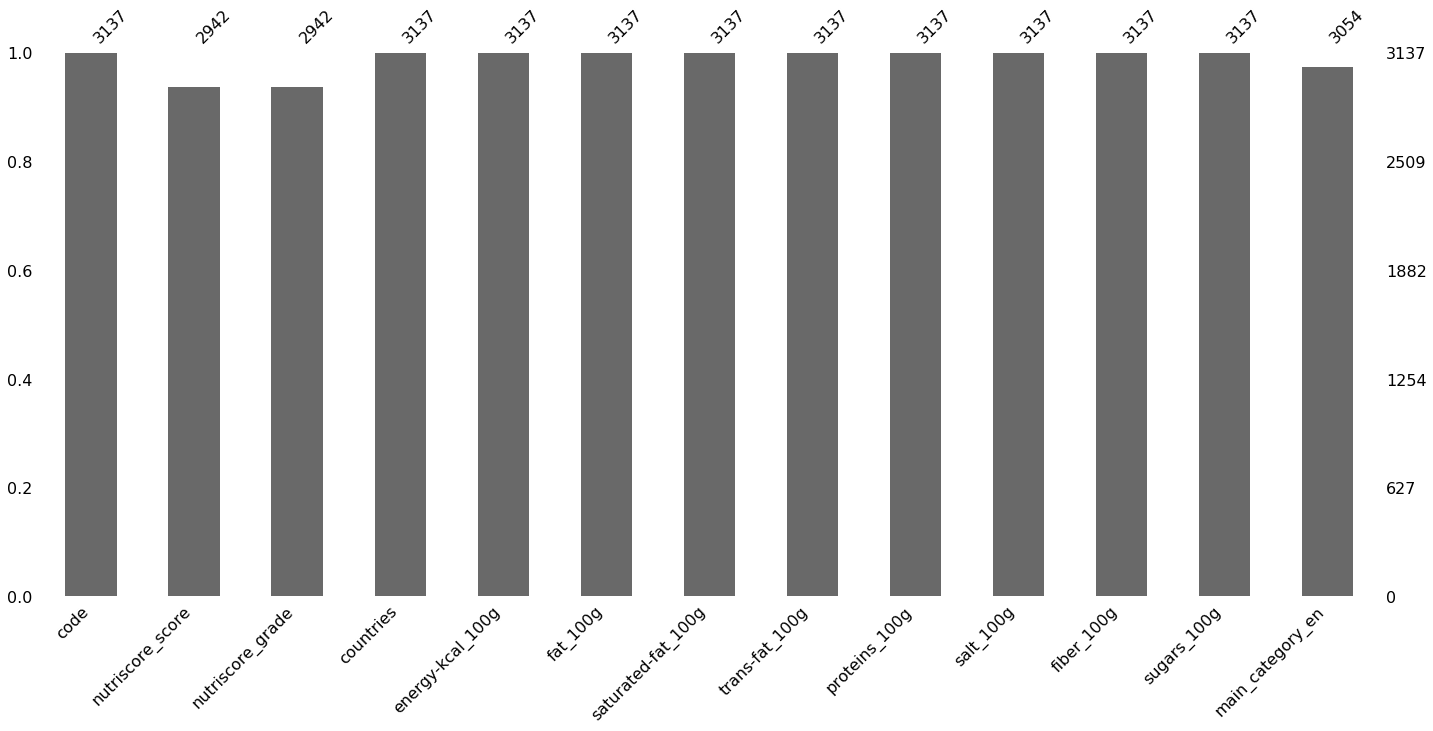

In [177]:
msno.bar(dp)

In [13]:
# consultation  des pays  qui commencent par fr 
l=[]
for col in dp.countries.unique():
    if col.__contains__("france")==False:
        print(col)
        l.append(col)

en:fr, united states
états-unis, en:fr
frankreich, vereinigte staaten von amerika, en:at
francia,méxico,estados unidos
francia,españa,estados unidos
en:french polynesia, united states
polynésie française, united states
frankreich, en:de, united states
frankreich, panama, united states
francia,méxico, united states, en:thailand
francia, united states
francia,méxico, united states
frankreich,deutschland, united states
frankreich,deutschland,vereinigte staaten von amerika
frankreich, deutschland, vereinigte staaten von amerika
belgien, dänemark, frankreich, spanien, vereinigte staaten von amerika, en:de
french polynesia, united states
frankreich,deutschland,schweiz,vereinigte staaten von amerika
barbados,francia,españa,estados unidos
francia, estados unidos
francia, spain, united states
frankreich, deutschland, united states
francia, méxico, estados unidos
francia,méxico,españa,estados unidos
french polynesia,united states
bolivia,francia,estados unidos
francia, israel, méxico
frankreich,

In [50]:
len(l)

89

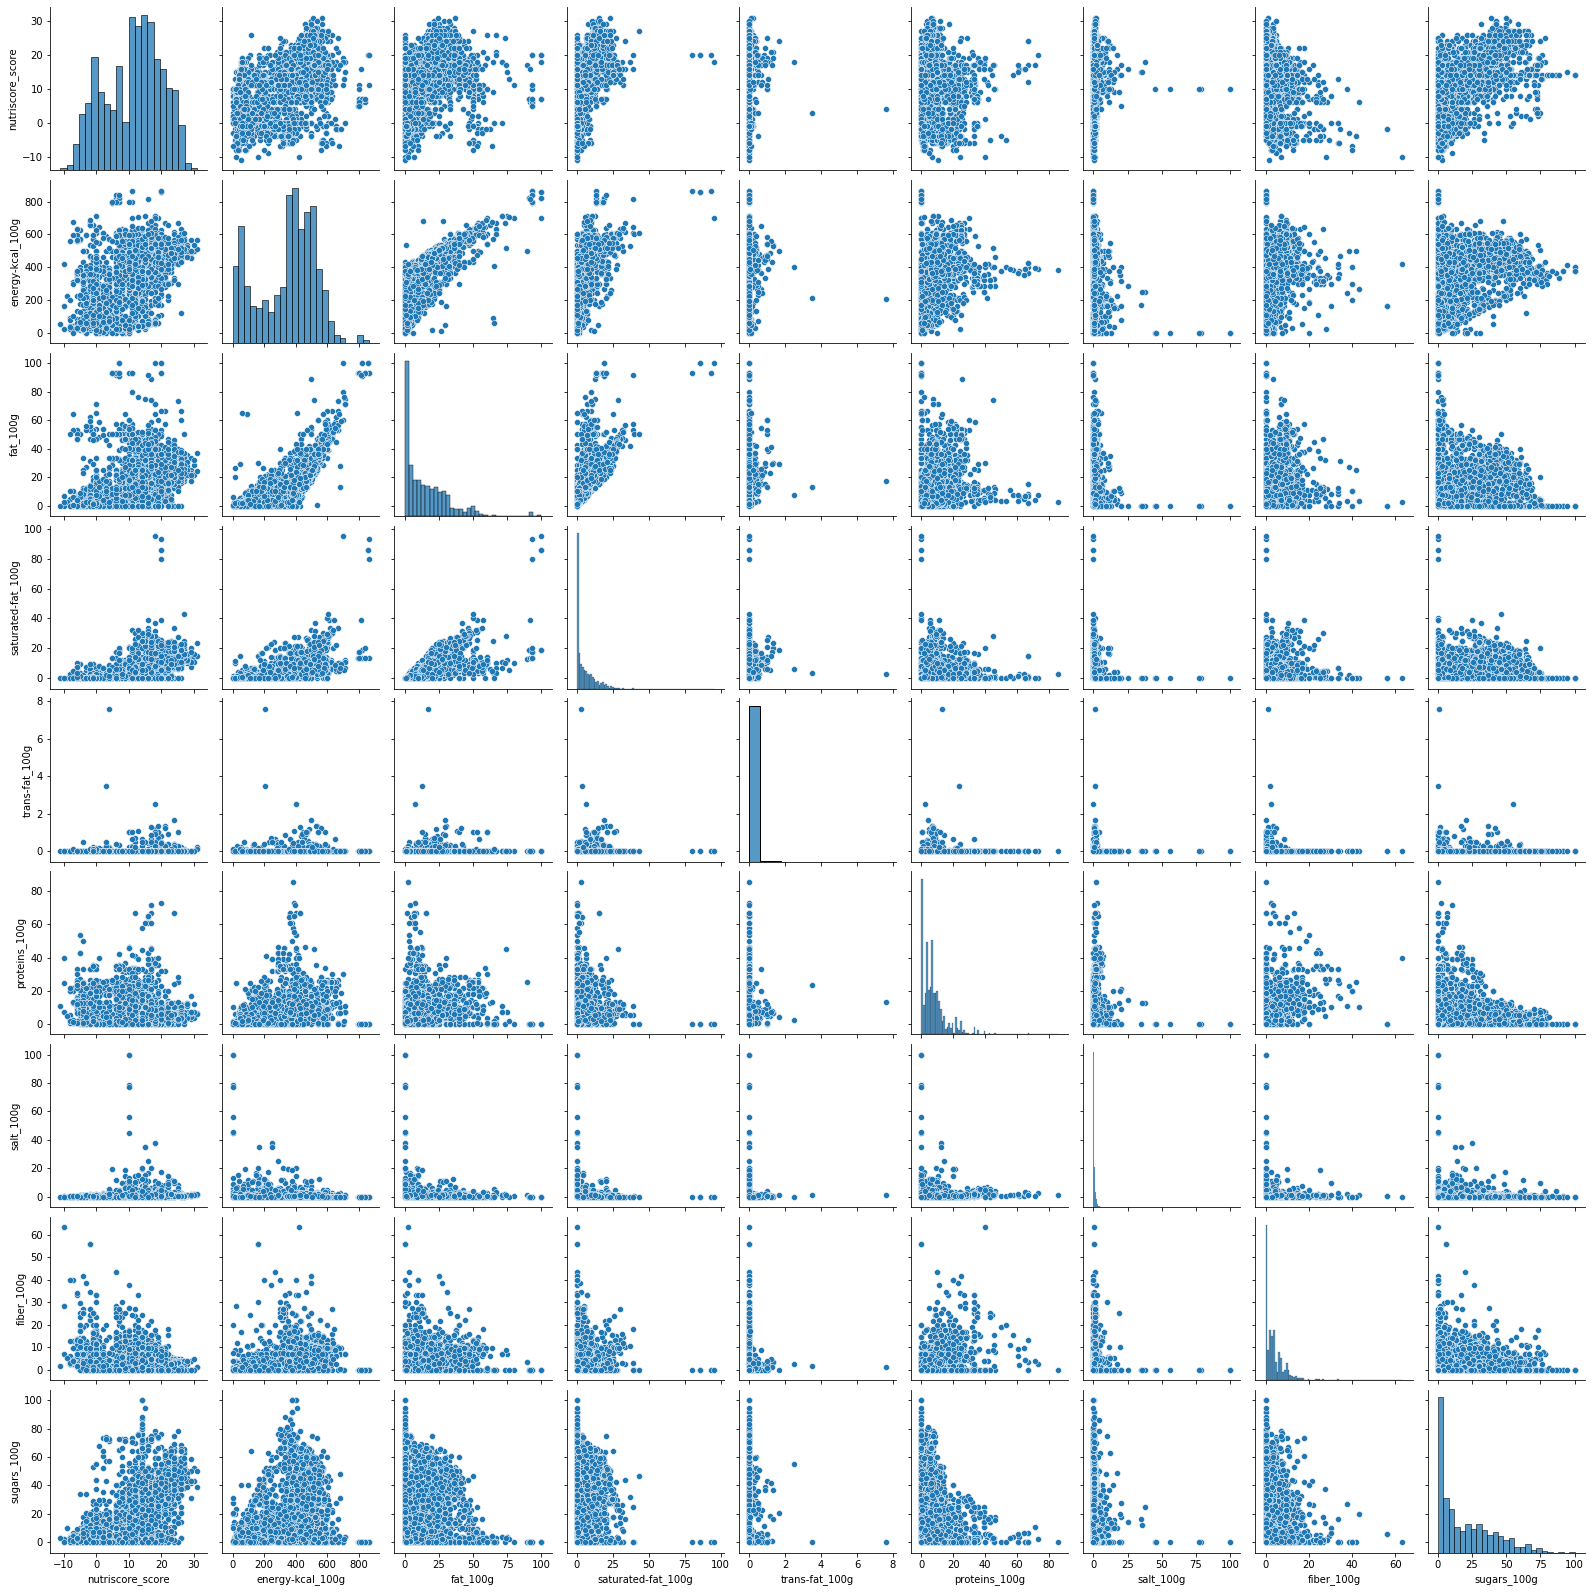

In [32]:
sns.pairplot(dp)

#### Sélection des produits ont un nutriscore-score null

In [14]:
dp[dp['nutriscore_score'].isna()]

code  nutriscore_score nutriscore_grade  \
9677       11110897312               NaN              NaN   
17546    0012000028496               NaN              NaN   
18011    0012000813313               NaN              NaN   
18988    0013000520508               NaN              NaN   
19237    0013130060356               NaN              NaN   
...                ...               ...              ...   
1605079  8850100206022               NaN              NaN   
1606565  8850643036919               NaN              NaN   
1638791  9555022300009               NaN              NaN   
1638792  9555022300016               NaN              NaN   
1638793  9555022300023               NaN              NaN   

                     countries  energy-kcal_100g  fat_100g  \
9677     france, united states              30.0      0.00   
17546    france, united states              51.0      0.60   
18011     france,united states              71.0      1.09   
18988        états-unis, en:fr             158.0      0.00   
19237    france, united states             371.0      0.00   
...                        ...               ...       ...   
1605079   france, en:australia             365.0      0.00   
1606565     france, états-unis               0.0      0.00   
1638791         france, suisse              90.0      3.70   
1638792         france, suisse              96.0      3.90   
1638793         france, suisse             430.0     19.20   

         saturated-fat_100g  trans-fat_100g  proteins_100g  salt_100g  \
9677                   0.00             0.0           1.00    0.00000   
17546                  0.38             0.0           2.50    0.18000   
18011                  0.73             0.0           2.19    0.09000   
18988                  0.00             0.0           0.00    4.01066   
19237                  0.00             0.0           6.00    0.54000   
...                     ...             ...            ...        ...   
1605079                0.00             0.0           7.00    0.02000   
1606565                0.00             0.0           0.00   45.55500   
1638791                2.20             0.0           2.00    1.20000   
1638792                2.20             0.0           2.10    1.20000   
1638793               10.00             0.0           9.60    1.20000   

         fiber_100g  sugars_100g       main_category_en  
9677            2.4         0.00                    NaN  
17546           0.0         6.25                    NaN  
18011           0.0        11.19                Coffees  
18988           0.0        31.58                    NaN  
19237           2.9        40.00                    NaN  
...             ...          ...                    ...  
1605079         1.0         0.00        Rice vermicelli  
1606565         0.0         0.00             Seasonings  
1638791        10.6         0.70  fr:soupes-de-nouilles  
1638792         7.0         0.70  fr:soupes-de-nouilles  
1638793        11.8         8.20  fr:soupes-de-nouilles  

[195 rows x 13 columns]

#### Type de varaibles dp avant imputation

In [17]:
dp.dtypes

code                   object
nutriscore_score      float64
nutriscore_grade       object
countries              object
energy-kcal_100g      float64
fat_100g              float64
saturated-fat_100g    float64
trans-fat_100g        float64
proteins_100g         float64
salt_100g             float64
fiber_100g            float64
sugars_100g           float64
main_category_en       object
dtype: object

#### Nombre de valeur nan pour chaque variable dp avant imputation 

In [18]:
dp.isna().sum()

code                    0
nutriscore_score      195
nutriscore_grade      195
countries               0
energy-kcal_100g        0
fat_100g                0
saturated-fat_100g      0
trans-fat_100g          0
proteins_100g           0
salt_100g               0
fiber_100g              0
sugars_100g             0
main_category_en       83
dtype: int64

#### Les valeurs possibles de variable nutriscore_score avant imputation

In [19]:
dp.nutriscore_score.value_counts()

 14.0    163
 10.0    150
 13.0    139
 16.0    137
 17.0    125
 11.0    122
 12.0    117
 0.0     116
 15.0    112
 18.0    100
 8.0      97
 19.0     97
 21.0     92
 24.0     88
 20.0     88
 7.0      87
-1.0      85
 9.0      85
 6.0      78
 1.0      74
 22.0     73
 23.0     72
-2.0      66
 2.0      65
-4.0      61
 3.0      59
 4.0      59
 25.0     54
-3.0      54
 26.0     47
-5.0      38
-6.0      38
 27.0     33
 5.0      29
-8.0       9
-7.0       9
 28.0      7
 29.0      7
 30.0      3
-10.0      3
 31.0      2
-11.0      1
-9.0       1
Name: nutriscore_score, dtype: int64

nutriscore_score existe bien dans  [-15,40]

#### Utilisation de la moyenne  pour  remplir  les valeurs manquantes de  la variable nutriscore_score

In [15]:
dpmean=dp.copy()

#### Valeur de moyenne de variable nutriscore_score

In [16]:
dpmean['nutriscore_score'].mean()

11.287899388171311

#### Remplissage des  nan(s) par la moyenne 

In [17]:
dpmean['nutriscore_score']=dpmean['nutriscore_score'].fillna(dpmean['nutriscore_score'].mean())

#### Remplissage des  nan(s) par la variable main_category par non renseigné

In [18]:
dpmean['main_category_en']=dpmean['main_category_en'].fillna('non renseigné')

#### Remplissage valeur manquante de la variable nutriscore_grade

In [19]:
dpmean[dpmean['nutriscore_score']==12]

code  nutriscore_score nutriscore_grade  \
21036      14100048435              12.0                d   
21194      14100085508              12.0                d   
21234      14100093626              12.0                d   
21365      14113734066              12.0                d   
25604      16000119604              12.0                d   
...                ...               ...              ...   
1499152  8432920804031              12.0                d   
1501663  8434165452930              12.0                d   
1611024  8886303210207              12.0                d   
1619708  9002859080333              12.0                d   
1640164  9588800664918              12.0                d   

                                                 countries  energy-kcal_100g  \
21036                                 en:fr, united states        458.000000   
21194    frankreich, vereinigte staaten von amerika, en:at        500.000000   
21234                         france,mexico, united states        467.000000   
21365                                france, united states        571.000000   
25604                                france, united states        391.000000   
...                                                    ...               ...   
1499152                             francia, united states        182.000000   
1501663                               en:fr, united states        458.015254   
1611024                                  france,états-unis        242.000000   
1619708                              france, united states        422.000000   
1640164                                  france, hong kong        506.000000   

          fat_100g  saturated-fat_100g  trans-fat_100g  proteins_100g  \
21036    18.750000            4.170000             0.0      12.500000   
21194    20.000000            1.670000             0.0      10.000000   
21234    15.000000            3.330000             0.0       6.670000   
21365    46.430000            5.360000             0.0      21.430000   
25604     4.350000            0.000000             0.0       8.700000   
...            ...                 ...             ...            ...   
1499152  10.000000            2.000000             0.0      18.500000   
1501663  22.900763            3.816794             0.0       7.633588   
1611024  25.000000           23.000000             0.0       2.300000   
1619708  15.040000            7.520000             0.0      11.280000   
1640164  24.900000            4.500000             0.2      11.100000   

         salt_100g  fiber_100g  sugars_100g  \
21036     1.770000         4.2         0.00   
21194     1.917500         3.3         3.33   
21234     1.042500         3.3        33.33   
21365     1.332500        10.7         7.14   
25604     1.412500         8.7        34.78   
...            ...         ...          ...   
1499152   2.250000         0.0         0.00   
1501663   1.812977         3.8         0.00   
1611024   0.080000         0.5         2.00   
1619708   1.102500         7.5         7.52   
1640164   0.020320         3.1        23.00   

                                      main_category_en  
21036                                         Biscuits  
21194                                         Crackers  
21234                                         Biscuits  
21365                                           Snacks  
25604                                Breakfast cereals  
...                                                ...  
1499152                         Mussels with escabeche  
1501663                                         Snacks  
1611024  Cremes-vegetales-a-base-de-coco-pour-cuisiner  
1619708                                  Salted-snacks  
1640164                            Biscuits-a-l-amande  

[117 rows x 13 columns]

In [20]:
dpmean[dpmean['nutriscore_score']==11]

code  nutriscore_score nutriscore_grade  \
8116       11110836700              11.0                d   
8174       11110838797              11.0                d   
8175       11110838841              11.0                d   
8178       11110838995              11.0                d   
15958      11225422119              11.0                d   
...                ...               ...              ...   
1381343  8015565030296              11.0                d   
1603170  8801052435596              11.0                d   
1619342  9002859035968              11.0                d   
1632805  9319186002045              11.0                d   
1639404  9556041600293              11.0                d   

                             countries  energy-kcal_100g  fat_100g  \
8116             france, united states             571.0     39.29   
8174             france, united states             167.0      0.00   
8175             france, united states             167.0      0.00   
8178              france,united states             167.0      0.00   
15958            états-unis, en:france             383.0      0.00   
...                                ...               ...       ...   
1381343          france, united states             433.0     13.33   
1603170  canada, états-unis, en:france             211.0      0.00   
1619342       en:france, united states             167.0      0.00   
1632805               australia,france             466.0     12.90   
1639404          france, united states             286.0     23.21   

         saturated-fat_100g  trans-fat_100g  proteins_100g  salt_100g  \
8116                   5.36             0.0           3.57     0.5800   
8174                   0.00             0.0           0.00     0.0700   
8175                   0.00             0.0           0.00     0.0700   
8178                   0.00             0.0           0.00     0.1400   
15958                  0.00             0.0           0.00     0.0825   
...                     ...             ...            ...        ...   
1381343                1.67             0.0          10.00     2.0000   
1603170                0.00             0.0           5.26     4.7375   
1619342                0.00             0.0           0.00     0.0700   
1632805                6.30             1.0          12.00     0.7470   
1639404                5.36             0.0          14.29     0.8925   

         fiber_100g  sugars_100g               main_category_en  
8116            3.6         3.57                         Snacks  
8174            0.0        44.44  Fruit and vegetable preserves  
8175            0.0        44.44  Fruit and vegetable preserves  
8178            0.0        44.44                   Fruit-spread  
15958           0.0        31.67                  Simple syrups  
...             ...          ...                            ...  
1381343         3.3         0.00             Biscuits and cakes  
1603170         5.3        21.05                         Sauces  
1619342         0.0        44.44  Fruit and vegetable preserves  
1632805         3.9         6.10                        Lavoshs  
1639404         0.0         0.00                       Sardines  

[122 rows x 13 columns]

#### Les nan(s) de la variable nutriscore_grade sont rempli  par 'd'

In [21]:
dpmean['nutriscore_grade']=dpmean['nutriscore_grade'].fillna('d')

#### Les valeurs possibles de variable nutriscore_grade apres imputation

In [22]:
dpmean.nutriscore_grade.value_counts()

d    1131
e     787
c     602
a     354
b     263
Name: nutriscore_grade, dtype: int64

#### Exportation dataframe dpmean en csv

In [23]:
dpmean.to_csv(r'C:\Users\HP\Desktop\OpenClassroom\P3_Ezznati_Tariq\Mesnotesbook\dataf.csv',index=False)
pd.read_csv('dataf.csv')

code  nutriscore_score nutriscore_grade  \
0         790310075              13.0                d   
1             14878              -1.0                a   
2             14892              -1.0                a   
3             16063               3.0                c   
4        2000007201               2.0                b   
...             ...               ...              ...   
3132  9556041612609              14.0                d   
3133  9556041613927              -1.0                a   
3134  9557062331128              17.0                d   
3135  9557129019006              16.0                d   
3136  9588800664918              12.0                d   

                                              countries  energy-kcal_100g  \
0                                 france, united states             300.0   
1                                 france, united states             570.0   
2                                 france, united states             594.0   
3                                 états-unis, en:france              66.0   
4                                  en:fr, united states             256.0   
...                                                 ...               ...   
3132  australia,belgium,france,united kingdom,united...             196.0   
3133                                   france,singapore             108.0   
3134                                    france,malaisie             517.0   
3135                                             france             813.0   
3136                                  france, hong kong             506.0   

      fat_100g  saturated-fat_100g  trans-fat_100g  proteins_100g  salt_100g  \
0         0.00                0.00             0.0           7.50    0.12500   
1        48.00                7.50             0.0          21.00    0.00000   
2        50.00                7.81             0.0          21.88    0.00000   
3         1.64                0.00             0.0           4.10    1.23000   
4         4.65                0.00             0.0           9.30    1.22000   
...        ...                 ...             ...            ...        ...   
3132     13.04                5.43             0.0           2.17    4.08686   
3133      0.80                0.30             0.0          24.90    0.86106   
3134     27.50               12.60             0.0           5.10    1.52750   
3135     92.00               39.00             0.0           0.00    0.00000   
3136     24.90                4.50             0.2          11.10    0.02032   

      fiber_100g  sugars_100g               main_category_en  
0            0.0        52.50                Confectioneries  
1            9.4         3.00                 Peanut butters  
2            9.4         3.12                 Peanut butters  
3            0.8         0.82                       Chowders  
4            2.3         4.65                         Breads  
...          ...          ...                            ...  
3132         4.3         8.70                   Curry pastes  
3133         0.0         0.00                  Tuna in brine  
3134         4.8         2.70  Salty snacks made from potato  
3135         0.0         0.00                      Palm oils  
3136         3.1        23.00            Biscuits-a-l-amande  

[3137 rows x 13 columns]

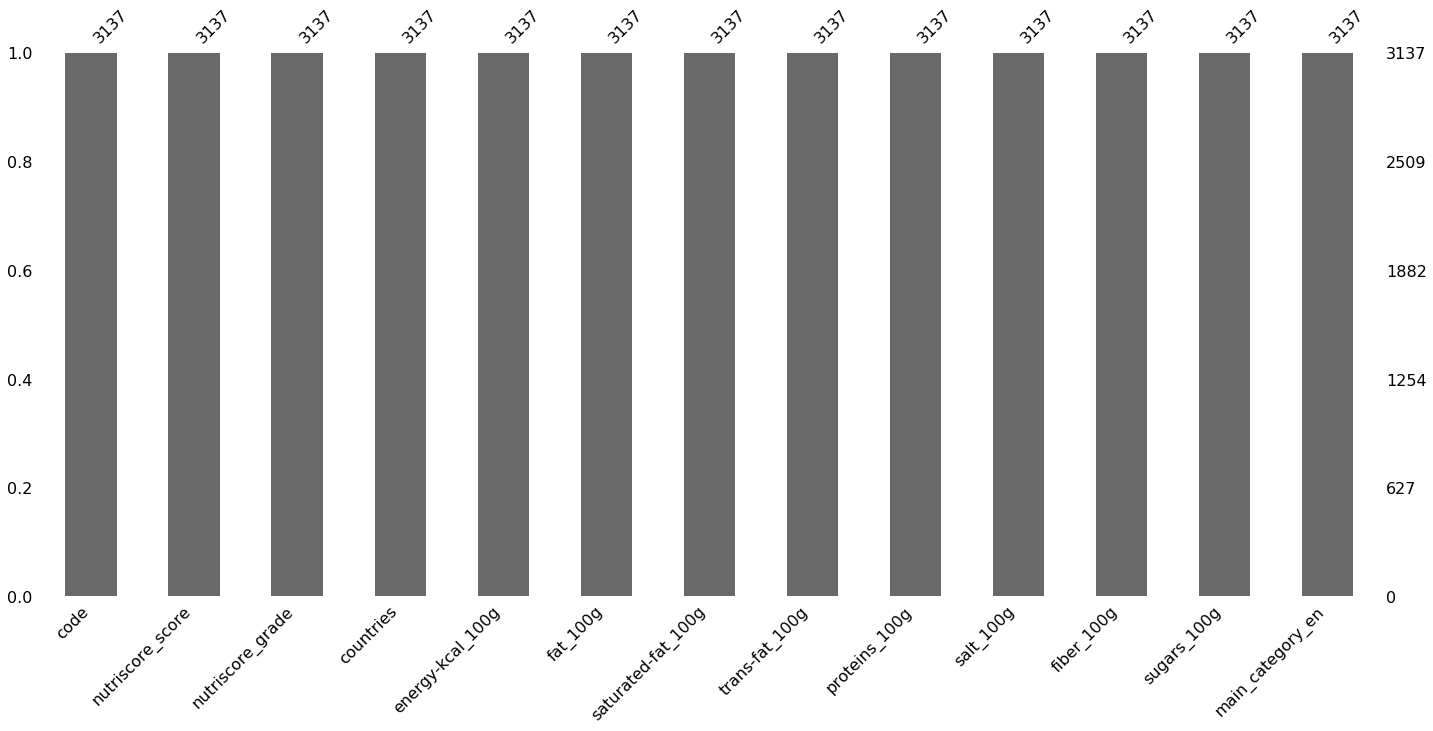

In [27]:
msno.bar( pd.read_csv('dataf.csv'))